# **Assessment Title:**
# **Deep Learning Kaggle Competition: Footprint Image Classification**

# **Student Information:**
# Write Your Name: Per Rafael Christensen
# Write Your Student ID:S5633681

# **Provide Kaggle Information**
# Add your Kaggle Username, final score on the Kaggle private leaderboard,and the total number of submissions you made to Kaggle.

# 1. Your Kaggle Username:raf935
# 2. Your final score on the Kaggle private leaderboard:70, 0.809
# 3. Total number of submissions you made to Kaggle:24

# Note: I applied for a extension and was entered into the private kaggle competition but chose to stay in the original Kaggle competition instead due to already having a final model.

# **Section 1.Introduction**

The goal of this project is to build and train a neural network that can classify footprints based on sex. The real-life use case of this neural network is for forensic analysis, where forensic scientists can determine an individual's sex based on their footprint at a crime scene. The neural network will be built with PyTorch and evaluated by the dataset in a Kaggle competition.

This deep learning project aims to evaluate how well a deep neural network can distinguish male and female footprints on the dataset, which architectural components affect validation performance, and how reliable such a model would be in a forensic context.

Footprints are found at about 40% of crime scenes and are the second most common evidence type found behind DNA (The Mystery of Lyle and Louise: Footprint Analysis, n.d.). Footprints are useful to investigators, as they can identify that an individual was present at a crime scene, eliminating an alibi, or if the suspects try and conceal fingerprints.

One way footprints are classified is by manual analysis. For example, forensic scientists will calculate the ratio between the heel and ball of the foot as well as gait patterns and dimensions of the foot to determine the sex of the individual who left those footprints (Estimation of Gender from the Dimensions of Foot, Footprints and Shoes, Pravesh Charan ISAI). This type of analysis is slow, prone to subjectivity, and has limited scalability. One solution that could address those weaknesses is an automated classifier that could help forensic scientists determine an individual's sex more consistently while reducing some forms of human subjectivity.

Footprint analysis is an image classification problem, as each footprint must be mapped to a binary label. While humans are able to perform this task, a machine learning approach would be a perfect solution to save time during an investigation. An accurate classifier can help cross-check other evidence and prioritise subjects and be used to support decisions made by forensic experts.

However, the ML approach may have issues that could affect the classification; therefore, it is important to note that due to the dataset, which will be black and white shapes forming a foot, the model may have issues during training, such as the variation in footprints, sensitivity to noise, and the limited dataset size.

In addition, if an ML model is too advanced, it may be difficult to explain how the ML algorithm gave a classification of a footprint; therefore, the classification of the footprint may be difficult to admit in court, as known error rates, clear methodologies, explainability, and validation of how the model classified the footprint are required. This issue is known as the 'Black Box' issue. Furthermore, treating the model's classifications as infallible evidence can contribute to bias or wrongful suspicion. It should be noted that careful validation of the model's predictions and XAI are needed before deployment in forensic teams.

To expand on machine learning approaches, the traditional ML methods, such as random forest and hand-crafted features + SVM, rely heavily on manual methods for measuring features of the dataset, such as footprint length and width. Which requires human expertise to identify the most relevant features, which can be labour-intensive and introduce human bias and error back into the equation. In addition, traditional ML models rely on modest but structured data, which means that traditional ML models do not do well with unstructured data such as images and therefore, will have difficulty extracting features from footprint images.

A new and innovative approach that can be used to classify footprint images based on sex is Convolutional Neural Networks/CNN, which learn hierarchical patterns in an image and extract features from raw pixels directly with much less human supervision. CNNs are a type of neural that uses convolution layers, pooling, flattening, and fully connected layers to extract edges, shapes, and patterns to predict a binary 0/1 number, which in our case refers to the sex of the individual. CNNs have an excellent track record in computer vision and image classification, and specifically within footprint classification, pre-trained CNN models such as ResNet and MobileNet provide the model architecture for researchers and forensic scientists to fine-tune and train the model to identify images. This is otherwise known as transfer learning and helps forensic teams and researchers that may have limited data.

To bring every idea that was discussed together, the scope of this project is as follows:

* Exploratory data analysis and preprocessing of the footprint dataset, visualising the data and exploring it for any limitations and biases that may affect the accuracy/results of the final model.

* Building a baseline CNN architecture from scratch as the control.

* Analysis of the state-of-the-art architectures such as ResNet and AlexNet for footprint classification.

* 10 distinct experiments, compared with the baseline control model to create a final and improved model.

* Final model evaluation and explainable AI.

* Conclusion and reflection on findings

# **Section 2. Exploratory Data Analysis (EDA) and Preprocessing:**

In this section, we are loading and analysing the dataset for any potential issues. One issue was that not all the images were the same size, so all footprints were resized into one size so we could see that the model's performance was due to the architecture. Bigger image sizes would give better accuracy but take longer to train, and memory requirements rise with the increased image size and also provide diminishing returns after a certain point. Therefore, all images were resized to 80 by 120 for speed.

There is a mild imbalance between the two classes: 845 samples of class 0 and 728 samples of class 1. The model might be slightly biased towards the majority class, which could affect validation accuracy on unseen data. However, in the final model we will see if the performance is comparable for both groups.

In the cell below, 3 images from both classes are shown.

For the baseline model as well as experiments 1-4, I will be using horizontal flips at a 50% probability, random colour jitter and normalising the image pixels to be centred around 0. Horizontal flips help the model to become invariant to left and right orientation, so if the same footprint appears mirrored in real data, then the model will be able to recognise it. Random greyscale and normalisation reduce sensitivity to lighting and scale differences, and as a result, the model is encouraged to focus on footprint shape rather than raw pixel intensity.


In [ ]:
#from google.colab import userdata
# Kagle API
#kaggle_key = userdata.get('kaggle_api')
#print(kaggle_key)

# put Kaggle API credentials where they belong
#!mkdir -p ~/.config/kaggle
#with open('/root/.config/kaggle/kaggle.json', 'w') as f:
#    f.write(kaggle_key)
#!chmod 600 ~/.config/kaggle/kaggle.json

In [ ]:
# Download footprint images - GOOGLE COLAB ONLY
#!pip install kaggle

#import kaggle
#!kaggle competitions download -c budl25 --force
#!unzip -o *.zip

In [ ]:
 # Check we have content
#!ls /content/

In [ ]:
# Kagle API
# put Kaggle API credentials where they belong
!mkdir -p ~/.config/kaggle
!echo '{"username":"raf935","key":"5a3d0f79b0c02cdb5c55b5a460de4fa1"}' > ~/.config/kaggle/kaggle.json
!chmod 600 ~/.config/kaggle/kaggle.json



In [ ]:
# Import all libraries

import pandas as pd
from dataclasses import dataclass
import random
from PIL import Image
import os
from tqdm.notebook import tqdm
from PIL import Image
import torch
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.v2 import Normalize, Compose, ToImage, ToDtype
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# View images in a csv file - GOOGLE COLAB ONLY

#input_dir = '/content/processed/processed'

input_dir = '/kaggle/input/footprintsrafdataset/budl25(1)/processed/processed'
csv_dir = '/kaggle/input/footprintsrafdataset/all_labels(1).csv'

df = pd.read_csv(csv_dir)
df.head(10)

,filename,ID,SEX
0,img_0000,366,1.0
1,img_0001,368,1.0
2,img_0002,368,1.0
3,img_0003,371,NaN
4,img_0004,371,NaN
5,img_0005,372,NaN
6,img_0006,372,NaN
7,img_0007,374,0.0
8,img_0008,374,0.0
9,img_0009,377,NaN


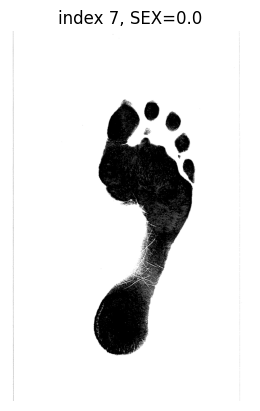

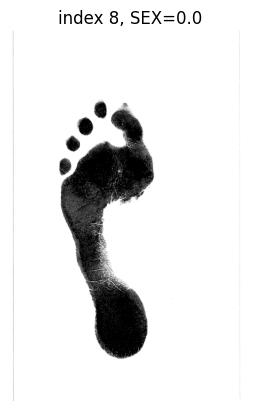

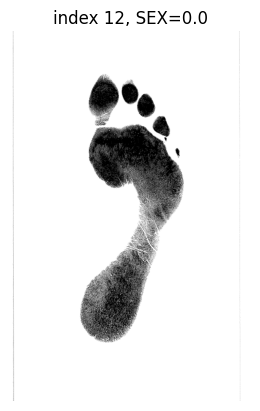

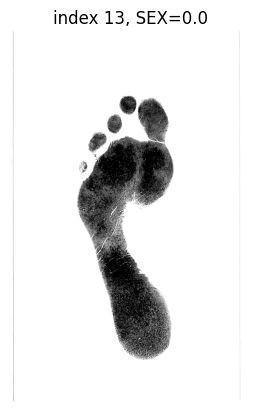

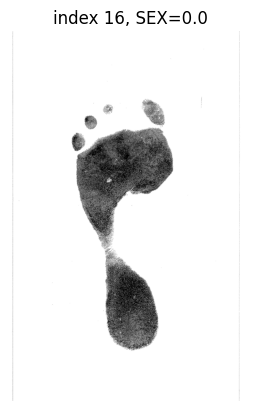

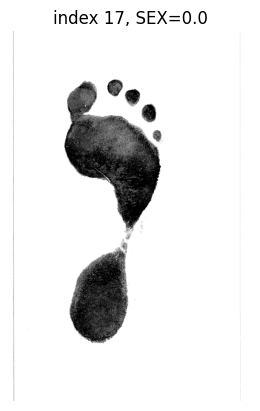

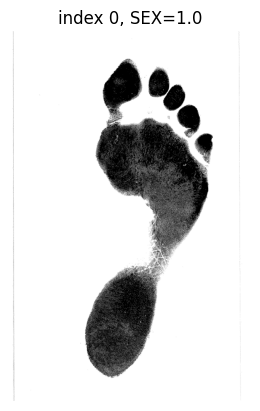

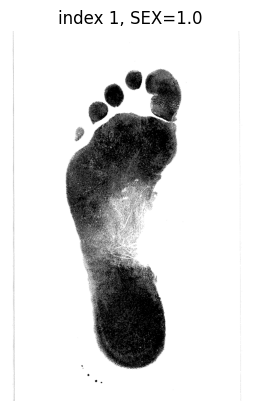

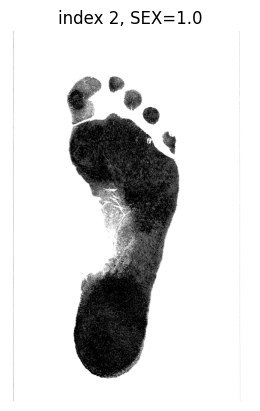

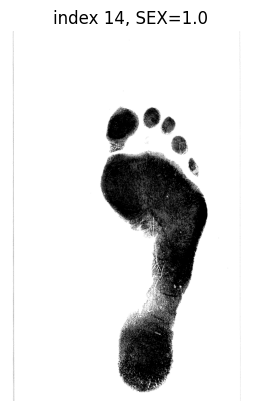

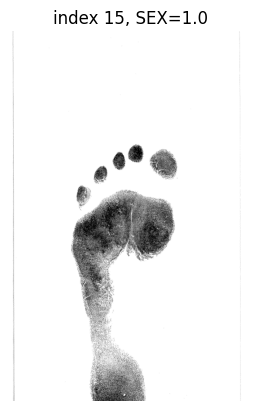

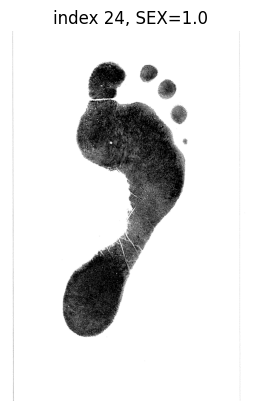

In [ ]:
df0 = df[df["SEX"] == 0.0]

for index, row in df0.head(6).iterrows():
    fname = row["filename"]
    path = f"{input_dir}/{fname}.png"
    im = Image.open(path)
    plt.imshow(im, cmap="gray")
    plt.title(f"index {index}, SEX=0.0")
    plt.axis("off")
    plt.show()

df1 = df[df["SEX"] == 1.0]

for index, row in df1.head(6).iterrows():
    fname = row["filename"]
    path = f"{input_dir}/{fname}.png"
    im = Image.open(path)
    plt.imshow(im, cmap="gray")
    plt.title(f"index {index}, SEX=1.0")
    plt.axis("off")
    plt.show()



In [ ]:
# Resize images for model

resized_folder = '/content/resized'

# Create a directory to save resized images
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

# Define the new size - this is very small and probably unusable but we'll use it for speed
new_size = (80, 120)

# Iterate through each image in the dataframe and resize
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    img_path = f'{input_dir}/{row["filename"]}.png'
    try:
        img = Image.open(img_path)
        resized_img = img.resize(new_size)
        resized_img.save(f'{resized_folder}/{row["filename"]}.png')
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

  0%|          | 0/2628 [00:00<?, ?it/s]

In [ ]:
# Assign footprint images that are labeled to train data
# Assign footprint images that are not labeled for test data
train_df = df[df['SEX'].notna()]
test_df = df[df['SEX'].isna()]

print("Train dataset size:", len(train_df))
print("Test dataset size:", len(test_df))

train_df['SEX'].value_counts()


Train dataset size: 1573
Test dataset size: 1055


SEX
0.0    845
1.0    728
Name: count, dtype: int64

In [ ]:
# This class turns our images into a dataset that can be used by the model
class FootprintDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.df.iloc[idx, 0] + '.png')
        image = Image.open(img_name).convert('L') # our images are greyscale
        sex = self.df.iloc[idx, 2]

        if self.transform: image = self.transform(image)

        # Handle NaN values in the target variable (test set)
        # For training and validation, sex will be 0.0 or 1.0, which needs to be long
        if pd.isna(sex):
            sex = -1
        else:
            sex = int(sex) # Explicitly cast to int

        return image, torch.tensor(sex, dtype=torch.long)

train_ds = FootprintDataset(train_df, resized_folder)
test_ds  = FootprintDataset(test_df,  resized_folder)

train_ds[0] # notice we're getting a PIL Image object, not tensor

(<PIL.Image.Image image mode=L size=80x120>, tensor(1))

In [ ]:
# Apply rotation and random shade of gray scale
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [ ]:
# Split training data into data that will update gradient
# and data that will be used to measure the difference between the ground truth
# and the model's prediction value
train_size = len(train_df)
valid_size = int(0.2 * train_size)
print(valid_size)

all_indices = list(range(train_size))
valid_ixs = random.sample(all_indices, valid_size)
train_ixs = list(set(all_indices) - set(valid_ixs))

train_ds = FootprintDataset(train_df.iloc[train_ixs], resized_folder, transform=train_transform)
valid_ds = FootprintDataset(train_df.iloc[valid_ixs], resized_folder, transform=val_transform)
test_ds  = FootprintDataset(test_df,  resized_folder, transform=val_transform)

train_ds[0]

314


(tensor([[[0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
          [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
          [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
          ...,
          [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
          [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
          [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.9529, 0.9529]]]),
 tensor(1))

In [ ]:
# Create dataloaders
bs = 32
train_loader = DataLoader(train_ds, batch_size=bs,   shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=2*bs, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=2*bs, shuffle=False)

bx, by = next(iter(train_loader))
bx.shape, by.shape

print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
# Define Dataclass to store losses, accuracy and plot data from trainNetwork
@dataclass
class TrainingData:
  train_losses: list
  dev_losses: list
  train_acc: list
  dev_acc: list
  epochs: list
  f1: float
  actuals: list
  predictions: list

# Dataclass that will hold the training configuration
@dataclass
class TrainingConfig:
  model: nn.Module
  loss_function: nn.Module
  optimizer: optim.Optimizer
  epochs: int
  train_data: DataLoader

In [ ]:
# Re initialise weights
def init_weights(m):
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

In [ ]:
# Train Network

def trainNetwork(model, epochs, loss_function, optimizer, dataset_loader):

  train_losses, dev_losses, train_acc_list, dev_acc_list = [], [], [], [] # Renamed dev_acc to dev_acc_list to avoid shadowing
  x_axis = []

  model.to(device) # Ensure model is on the correct device
  print(f"Model's first conv layer weight device: {model.conv1.weight.device}")

  for e in range(1, epochs+1):
      epoch_train_losses = 0 # Use temporary variable for current epoch's train loss
      epoch_train_acc = 0    # Use temporary variable for current epoch's train accuracy
      iterations = 0
      model.train()
      for data, target in dataset_loader:
          iterations += 1 # Ensure iterations is incremented for each batch
          # Ensure data and target are on CPU first, then move to the determined device
          # This is a defensive step for persistent CUDA/CPU mismatch errors
          data = data.cpu().to(device)
          target = target.cpu().to(device)

          pred = model(data)
          loss = loss_function(pred, target)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          epoch_train_losses += loss.item()
          # For accuracy, use argmax on logits
          top_class = torch.argmax(pred, dim=1)
          epoch_train_acc += accuracy_score(target.to("cpu"), top_class.to("cpu"))

      epoch_dev_loss = 0 # Use temporary variable for current epoch's dev loss
      epoch_dev_acc = 0  # Use temporary variable for current epoch's dev accuracy
      iter_2 = 0

      if e%5 == 0 or e == 1:
          x_axis.append(e)

          with torch.no_grad():
              model.eval()

              for data_dev, target_dev in valid_loader:
                  iter_2 += 1

                  # Ensure data_dev and target_dev are on CPU first, then move to the determined device
                  data_dev = data_dev.cpu().to(device)
                  target_dev = target_dev.cpu().to(device)

                  dev_pred = model(data_dev)
                  loss_val = loss_function(dev_pred, target_dev) # Store loss in a temporary variable
                  epoch_dev_loss += loss_val.item() # Accumulate validation loss

                  top_class = torch.argmax(dev_pred, dim=1)
                  epoch_dev_acc += accuracy_score(target_dev.to("cpu"), top_class.to("cpu")) # Accumulate validation accuracy

          train_losses.append(epoch_train_losses/iterations)
          dev_losses.append(epoch_dev_loss/iter_2) # Append the calculated average dev loss
          train_acc_list.append(epoch_train_acc/iterations)
          dev_acc_list.append(epoch_dev_acc/iter_2) # Append the calculated average dev accuracy

          print("Epoch: {}/{}.. ".format(e, epochs),
                "Training Loss: {:.3f}.. ".format(epoch_train_losses/iterations),
                "Validation Loss: {:.3f}.. ".format(epoch_dev_loss/iter_2),
                "Training Accuracy: {:.3f}.. ".format(epoch_train_acc/iterations),
                "Validation Accuracy: {:.3f}".format(epoch_dev_acc/iter_2))
  print('Finished Training')

  all_dev_preds = []
  all_dev_targets = []
  model.eval()
  with torch.no_grad():
      for data_dev, target_dev in valid_loader:
          data_dev = data_dev.cpu().to(device)
          target_dev = target_dev.cpu().to(device)

          dev_pred = model(data_dev)
          top_class = torch.argmax(dev_pred, dim=1)

          all_dev_preds.extend(top_class.cpu().numpy())
          all_dev_targets.extend(target_dev.cpu().numpy())

  final_f1 = f1_score(all_dev_targets, all_dev_preds, average="binary")
  print("Final validation F1:", final_f1)
  # return train_losses, dev_losses, train_acc, dev_acc, epoch, f1 score
  return TrainingData(
    train_losses=train_losses,
    dev_losses=dev_losses,
    train_acc=train_acc_list,
    dev_acc=dev_acc_list,
    epochs=x_axis,
    f1=final_f1,
    actuals=all_dev_targets,
    predictions=all_dev_preds
)


In [ ]:
# Function for plotting loss
def pltLoss(training_data):
  plt.plot(training_data.epochs, training_data.train_losses, label='Training loss')
  plt.plot(training_data.epochs, training_data.dev_losses, label='Validation loss')
  plt.legend(frameon=False)
  plt.show()

In [ ]:
# Function for plotting Accuracy
def pltAccuracy(training_data):
  #plt.figure(figsize=(10, 5))
  plt.plot(training_data.epochs, training_data.train_acc, label="Training accuracy")
  plt.plot(training_data.epochs, training_data.dev_acc, label="Validation accuracy")
  plt.legend(frameon=False)
  plt.show()

In [ ]:
def validateNetwork(model):
  model.eval()
  iter_3 = 0
  acc_test = 0

  model.to(device) # Ensure model is on the correct device for evaluation

  for data_test, target_test in valid_loader:
      iter_3 += 1
      # Ensure data_test is on CPU first, then move to the determined device
      data_test = data_test.cpu().to(device)
      test_pred = model(data_test)
      top_class_test = torch.argmax(test_pred, dim=1) # Argmax on logits
      # target_test to CPU for accuracy_score
      acc_test += accuracy_score(target_test.to("cpu"), top_class_test.to("cpu"))
  return acc_test/iter_3

In [ ]:
# Function for submitting network
def submitNetwork(model):
  all_predictions = []
  model.eval() # Set the model to evaluation mode

  with torch.no_grad(): # Disable gradient calculations for inference
      for data_test, _ in test_loader: # We don't need target_test here
          data_test = data_test.cpu().to(device)
          test_pred = model(data_test)

          # Get the predicted class (0 or 1) by taking the argmax of the logits
          predicted_classes = torch.argmax(test_pred, dim=1)
          all_predictions.extend(predicted_classes.cpu().numpy())

  # Create a DataFrame for submission
  submission_df = pd.DataFrame({'filename': test_df['filename'], 'SEX': all_predictions})

  # Display the first few predictions
  display(submission_df.head())

  # Save to a CSV file for Kaggle submission
  submission_df.to_csv('submission.csv', index=False)
  print("Predictions saved to submission.csv")

  return submission_df

In [ ]:
import copy

def trainNetworkEarlyStopping(model, epochs, loss_function, optimizer, dataset_loader):
    train_losses, dev_losses, train_acc_list, dev_acc_list = [], [], [], []
    x_axis = []

    model.to(device)
    print(f"Model's first conv layer weight device: {model.conv1.weight.device}")

    best_val_acc = -1.0
    best_state = None
    best_epoch = None

    for e in range(1, epochs+1):
        epoch_train_losses = 0
        epoch_train_acc = 0
        iterations = 0

        model.train()
        for data, target in dataset_loader:
            iterations += 1
            data = data.to(device)
            target = target.to(device)

            pred = model(data)
            loss = loss_function(pred, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_train_losses += loss.item()
            top_class = torch.argmax(pred, dim=1)
            epoch_train_acc += accuracy_score(target.cpu(), top_class.cpu())

        epoch_dev_loss = 0
        epoch_dev_acc = 0
        iter_2 = 0

        if e % 5 == 0 or e == 1:
            x_axis.append(e)

            with torch.no_grad():
                model.eval()
                for data_dev, target_dev in valid_loader:
                    iter_2 += 1
                    data_dev = data_dev.to(device)
                    target_dev = target_dev.to(device)

                    dev_pred = model(data_dev)
                    loss_val = loss_function(dev_pred, target_dev)
                    epoch_dev_loss += loss_val.item()

                    top_class = torch.argmax(dev_pred, dim=1)
                    epoch_dev_acc += accuracy_score(target_dev.cpu(), top_class.cpu())

            # averages
            train_losses.append(epoch_train_losses / iterations)
            dev_losses.append(epoch_dev_loss / iter_2)
            train_acc_list.append(epoch_train_acc / iterations)
            current_val_acc = epoch_dev_acc / iter_2
            dev_acc_list.append(current_val_acc)

            print(
                f"Epoch: {e}/{epochs}.. "
                f"Training Loss: {epoch_train_losses/iterations:.3f}.. "
                f"Validation Loss: {epoch_dev_loss/iter_2:.3f}.. "
                f"Training Accuracy: {epoch_train_acc/iterations:.3f}.. "
                f"Validation Accuracy: {current_val_acc:.3f}"
            )

            # If the current validation accuracy is higher than best validation accuracy
            # then we save it and make a copy of the curent model's parametres
            if current_val_acc > best_val_acc:
                best_val_acc = current_val_acc
                best_state = copy.deepcopy(model.state_dict())
                best_epoch = e
                print(f"--> New best val acc: {best_val_acc:.3f} at epoch {best_epoch}")

    print("Finished Training")

    # restore best weights if we found any validation point
    if best_state is not None:
        model.load_state_dict(best_state)
        print(f"Model weights restored to best epoch {best_epoch} "
              f"with val acc {best_val_acc:.3f}")

    all_dev_preds = []
    all_dev_targets = []
    model.eval()
    with torch.no_grad():
      for data_dev, target_dev in valid_loader:
          data_dev = data_dev.cpu().to(device)
          target_dev = target_dev.cpu().to(device)

          dev_pred = model(data_dev)
          top_class = torch.argmax(dev_pred, dim=1)

          all_dev_preds.extend(top_class.cpu().numpy())
          all_dev_targets.extend(target_dev.cpu().numpy())

    final_f1 = f1_score(all_dev_targets, all_dev_preds, average="binary")
    print("Final validation F1:", final_f1)

    return TrainingData(
        train_losses=train_losses,
        dev_losses=dev_losses,
        train_acc=train_acc_list,
        dev_acc=dev_acc_list,
        epochs=x_axis,
        f1=final_f1,
        actuals=all_dev_targets,
        predictions=all_dev_preds
    )


# **Section 3 Model and training**



In [ ]:
# Define model architecture

class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x # Return raw logits for CrossEntropyLoss

net = CNN()

print(net)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7344, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
# Define Loss function and optimiser
# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

net = CNN().to(device)
net.apply(init_weights)

# Set the training parametres for trainNetwork()
netTrainingConfig = TrainingConfig(
    model=net,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net.parameters(), lr=0.001),
    epochs=50,
    train_data=train_loader
)

Using device: cuda


In [ ]:
print(len(netTrainingConfig.train_data))

40


In [ ]:
# Run Baseline CNN model
net_training_data = trainNetwork(netTrainingConfig.model, netTrainingConfig.epochs, netTrainingConfig.loss_function, netTrainingConfig.optimizer, netTrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50..  Training Loss: 1.128..  Validation Loss: 0.718..  Training Accuracy: 0.596..  Validation Accuracy: 0.614
Epoch: 5/50..  Training Loss: 0.446..  Validation Loss: 0.525..  Training Accuracy: 0.791..  Validation Accuracy: 0.751
Epoch: 10/50..  Training Loss: 0.273..  Validation Loss: 0.566..  Training Accuracy: 0.887..  Validation Accuracy: 0.774
Epoch: 15/50..  Training Loss: 0.191..  Validation Loss: 0.747..  Training Accuracy: 0.927..  Validation Accuracy: 0.720
Epoch: 20/50..  Training Loss: 0.100..  Validation Loss: 0.809..  Training Accuracy: 0.963..  Validation Accuracy: 0.739
Epoch: 25/50..  Training Loss: 0.059..  Validation Loss: 0.961..  Training Accuracy: 0.980..  Validation Accuracy: 0.736
Epoch: 30/50..  Training Loss: 0.031..  Validation Loss: 0.970..  Training Accuracy: 0.989..  Validation Accuracy: 0.740
Epoch: 35/50..  Training Loss: 0.046..  Validation Loss: 1.303..  Training Accuracy: 0.984..  Validation Acc

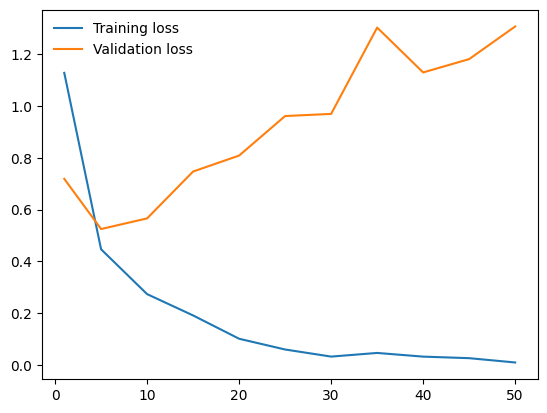

In [ ]:
# Plot Loss
pltLoss(net_training_data)

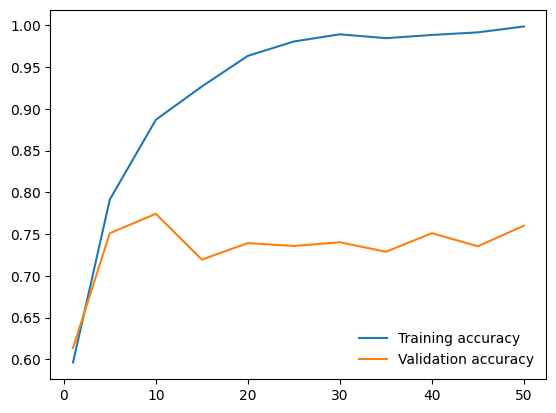

In [ ]:
# Plot Accuracy
pltAccuracy(net_training_data)

In [ ]:
# Validate baseline model
net1Result = validateNetwork(net)

print(net1Result)

0.7601293103448276


# Section 4. State-of-the-Art Model Analysis

State-of-the-art models, built and trained by well-funded research teams around the world, provide classifiers that are trained on millions of images so that individuals or teams that are interested in solving solutions with artificial intelligence are able to use them and fine-tune these pre-trained models for their own classifications and use cases. This is also known as transfer learning. In this section, I will compare 3 different convolutional architectures before using one for experimentation. This is so that I can find and use a pre-trained CNN most useful for my use case, footprint sex classification.

**ResNet 18**

ResNet, or Residual Network, is a type of convolutional neural network (CNN) introduced by Microsoft Research in 2015 and stacks residual blocks.

Each residual block takes an input x, applies a stack of layers, such as convolutional, batch norm and ReLU, to compute the output F(x), then adds the original input x back, which is shown as y = F(x) + x. If F(x) is close to 0, then the residual block outputs the input so the gradients can still propagate easily through the shortcut path, or in other words, use the block output x as the input for the next residual block, which can help reduce the vanishing-gradient problem in deep networks. (Deep Residual Networks (ResNet, ResNet-50) A Complete Guide, Gaudenz Boesch)

* ResNet 18 consists of 18 deep layers which are divided into 5 convolutional layers for extracting feature maps, one ReLU layer, one pooling layer to reduce image size and a fully connected layer to convert feature maps from 2D to 1D to then classify images into their predicted class[Kaiming He et al, Dec 2015]

* ResNet 18 is considered a small CNN with 11.7 million trainable parameters as compared to larger variants such as ResNet 50 with about 20 million trainable parameters. [Kaiming He et al, Dec 2015]

* ResNet 18 performs 1.8 billion FLOPS for each forward pass through the network for an image size of 224x224 pixels.

**Pros of using ResNet 18 for this project**

* While ResNet 18 is a much smaller model, when using small, greyscale images such as those in my dataset, the model should be able to perform relatively well, as there is only one channel instead of 3 for the model to handle.

* In addition, as ResNet 18 performs 1.8 billion FLOPS per forward pass, it is computationally cheaper and faster on a weaker machine as compared to ResNet50, which performs 3.8 billion FLOPs per forward pass. Considering the small size of each image and that the model only has to handle brightness, as there is only 1 colour channel rather than 3, ResNet 18 is a better choice, as we can spend more time fine-tuning the parameters of the model, as each forward pass takes less time than a bigger variant for the same accuracy.

**Cons of using ResNet 18 for this project**

* One problem that could affect ResNet18's validation accuracy for this footprint task is overfitting and data issues. These could be because of the smaller dataset that the model will be trained on, and if the data augmentation is not correctly implemented, that could cause data issues, which makes the model memorise patterns rather than generalise and learn new patterns and connections in each image.

**AlexNet**

AlexNet was built and trained by the Supervision Team from the University of Toronto, consisting of Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton.

AlexNet won ILSVRC in 2012 through their innovative CNN architecture learning complex, hierarchal features from raw pixels, rather than crafting the features manually by hand[Krizhevsky, A. et al, 2012]. AlexNet achieved a top-5 error rate of 15.3% compared to the second place 26.2%, which showed that AlexNet's innovations were groundbreaking and set the direction of deep neural networks for new models.

AlexNet's convolutional layers were much deeper than earlier successful shallower models. This is because in 2012 the ILSVRC increased the difficulty of the challenge, as models had to classify 100,000 test images into 1000 classifications. Thus AlexNet was built with 5 convolutional layers, with the first convolutional layer having a window shape of 11x11 due to the larger image size of the ILSVRC 2012 dataset, so a larger window shape could capture more detail. After a pooling layer is applied to the output of the convolutional layers, the window shape of the next convolutional window is made smaller. This helped the model find hierarchical features through the raw pixels only [Krizhevsky, A. et al, 2012].

While this architecture was thought to be computationally expensive, the paradigm of using sigmoid activation functions in shallower neural networks was challenged, and the Supervision team used ReLU activation functions instead, thus speeding up the training process to about 5/6 days with two NVIDIA GTX 580 GPUs. In addition, using ReLU instead of Sigmoid activation functions reduced the vanishing gradients problem, as when using the Sigmoid function, the output could be very close to 0, so backpropagation cannot continue to update some of the model's parameters. Therefore, if the parameters were not properly initialised, then the model cannot effectively be trained. [6]

AlexNet is structured as follows:

* 5 convolutional layers to extract meaningful features.

* 3 max pooling layers reduce dimensions down to the most prominent features.

* 3 Fully connected Layers – Interprets features and classifies via a 1000-way softmax function.

* AlexNet has 60 million trainable parameters [Krizhevsky, A. et al, 2012] compared to a much larger 144 million for VGG19.

* AlexNet performs 0.72 billion FLOPs per forward pass.

**Pros of using AlexNet for this project**

* AlexNet is a more computationally efficient model than other models such as ResNet 50, with a considerable amount of trainable parameters. We can use the concept of transfer learning and fine-tune our instance of AlexNet for our footprint classification problem in a time-efficient way and get high validation accuracy.

* To add, AlexNet uses a dropout layer after every fully connected layer, where 50% of neurones are turned off [7]. For our footprint classifier, a small dataset is given to train and validate our network. Whether this is a pre-trained model or my baseline model built from scratch, the dataset is fairly small; therefore, overfitting is a likely problem we will encounter during the systematic experimentation section to find our final model; however, AlexNet could be a good candidate for experimentation, as a dropout layer is a regularisation technique to combat overfitting by preventing co-adaptation among the most activated neurones so that the neurones are more likely to find more meaningful features and patterns.

**Cons of using AlexNet for this project**

* While AlexNet is a more computationally efficient model than other models such as ResNet 50 and VGG19, AlexNet still required 2 NVIDIA GPUs to train the neural network in 6 days for the ILSVRNC; On the other hand, the ILSVRNC provided research teams with 1.2 million images to train their model on to classify 100,000 test images into 1000 classifications, and for this project we will be using just over 1500 training images to train our model for our footprint problem. Therefore, AlexNet is a feasible model for our problem definition.

* AlexNet may be prone to overfitting. Although AlexNet used dropout layers after the fully connected layers, due to the large amount of trainable parameters, AlexNet was prone to memorising patterns rather than generalising images unless an enhanced and thorough use of data augmentation was implemented, such as flipping, cropping, and random erasion. For the baseline model, I used horizontal flip with a 50% chance and random colour jitter. AlexNet used 2 geometric transformations: random cropping of images and horizontal flipping. These two augmentations increased the data size by a factor of 2048. Another data augmentation technique that AlexNet used was PCA/Principle Component Analysis colour augmentation. PCA colour augmentation takes a look at how RGB values vary across the whole dataset, then for each image, slightly shifts its colours along those main colour directions. This changes the overall colour tone realistically and helps the model handle different lighting and colour conditions.

**EfficientNet**

EfficientNet is a family of convolutional neural networks introduced by researchers at Google AI in 2019.

EfficientNet offers high accuracy and low computational cost through an innovative technique called 'compound scaling', where d, w and r are depth, width and image size respectively, and are fixed ratios that each have a base factor: a, b, and y respectively, with each base factor being scaled by a single compound coefficient[Mingxing Tan et al, 2020].

Initially, the researchers built a baseline model, 'EfficientNetB0', tuned and trained the network to find the initial FLOP count and assigned the initial compound coefficient to be 1. Assuming a feasible compute budget of 2x more FLOP, the researchers performed a grid search over base factors: a, b and y under the FLOP constraint. The researchers found a base factor of a = 1.2, b = 1.1, y = 1.15, gave the best validation accuracy for the baseline model. The researchers then froze the base factors and tuned the compound coefficient to different values to get models 'B0-B7' [Mingxing Tan et al, 2020].

The rationale behind a dynamically sizable neural network was that instead of building variations of an existing network such as ResNet 50, resized into ResNet 18, 34 and 154 via tuning the amount of layers, depth, and width, you could build one baseline architecture and then expand each parameter via a proportional coefficient [Mingxing Tan et al, 2020]. Thus resulting in an efficient neural network that demonstrates a high validation accuracy with a disproportionately lower computational cost.

EfficientNet is structured as follows:

* 1 standard 3x3 convolutional layer.

* 7 inverted residual blocks with 1-3 MBConvo layers in each block.

An MBConvo layer consists of 3 main stages:

* Expansion layer, where it takes a thin input and expands into many channels.

* Depthwise convolution is where each channel is filtered separately.

* The projection layer, where all the channels are squeezed back into the original input size.

* Additionally, an optimisation named 'Squeeze-and-excitation' is applied in each of the MBConvo layers. The squeeze phase is where the feature map is squeezed into one vector. The excitation phase is where each channel is assigned a weight of importance.

* 1 standard 1x1 convolutional layer - expand number of channels to 1280.

* Pooling layer - take the average of every pixel in each 7x7 map to get a one-dimensional vector of 1280.

* Fully connected layer to classifiy the vector into 1000 classifications [Mingxing Tan et al, 2020].

* While the ILSVRC ended in 2017, EfficientNet was considered a state-of-the-art model, achieving the highest validation accuracy on the ImageNet test dataset with fewer parameters than previous models. The largest model, 'EfficientNetB7' achieved top 1% accuracy of 84.3% and top 5% accuracy of 97.1% on the ILSVRC 2012 classification dataset. EfficientNetB7 has 66 million parameters and 37 billion FLOPs per forward pass[9]. Compared to AlexNet top 1% accuracy of 63.5% and top 5% accuracy of 84.7% on the ILSVRC 2012 classification dataset.

**Pros of Using EfficientNet**

* A strength of using EfficientNet for the footprint classification problem is that tuning the neural network can be done via increasing the compound coefficient by 1. For example, we train EfficientNet-B0 on our footprint dataset and validate the network to get the validation accuracy and F1-score, then try EfficientNet-B1 to see if it could provide an increase in validation accuracy while still maintaining computational efficiency[10] or even EfficientNet-B2 could show even greater results.

* EfficientNet provides greater parameter efficiency than other models such as ResNet. This is evident from when EfficientNet and ResNet variants were trained and tested on the ILSVRC 2012 dataset. For example, EfficientNet-B1 had a top 1% accuracy of 79.1% with a parameter count of 7.8 million; while on the other hand, ResNet-152 had a top 1% accuracy of 77.8% with a parameter count of 60 million. The smaller parameter count of EfficientNet-B1 could suggest that for our small and greyscale dataset of footprint images, overfitting could be less of an issue as compared to a larger model such as ResNet-152 or VGG19 [Mingxing Tan et al, 2020].

**Cons of Using EfficientNet**

* It is generally recommended to use EfficientNet-B0 OR EfficientNetV2 as our baseline model, then increase the compound scale[Washija Kazim, 2025]; however, the jump in parameter count from EfficientNet-B1 to EfficientNet-B3 is approximately a 50% increase. This suggests that for our dataset, there may be too many parameters, and we will have to fine-tune the specific variant of EfficientNet that we may use rather than increase the compound coefficient thus it may require rigorous experimentation to find the right model for our dataset [Mingxing Tan et al, 2020].

In [ ]:
import pandas as pd

summary_rows = [
    {"Model": "ResNet18",
     "Parameters": "11.7 million",
     "FLOPs (G)": "1.7",
     "Learnable Layers": 18,
     "Top 1% Accuracy": "67.5%",
     "Top 5% Accuracy": "88.1%"},

    {"Model": "AlexNet",
     "Parameters": "60 million",
     "FLOPs (G)": "70",
     "Learnable Layers": 8,
     "Top 1% Accuracy": "63%",
     "Top 5% Accuracy": "84.7%"},

    {"Model": "EfficientNet-B7",
     "Parameters": "66 million",
     "FLOPs (G)": "37",
     "Learnable Layers": "813(Including non-learnable)",
     "Top 1% Accuracy": "84.3%",
     "Top 5% Accuracy": "97.1%"},]

results_df = pd.DataFrame(summary_rows)
results_df

# ResNet18 top 1% and 5% accuracy available at:
# https://github.com/HolmesShuan/ResNet-18-Caffemodel-on-ImageNet
# Using the Both256 row.

,Model,Parameters,FLOPs (G),Learnable Layers,Top 1% Accuracy,Top 5% Accuracy
0,ResNet18,11.7 million,1.7,18,67.5%,88.1%
1,AlexNet,60 million,70,8,63%,84.7%
2,EfficientNet-B7,66 million,37,813(Including non-learnable),84.3%,97.1%


# Section 5. Systematic Experimentation for Model Improvement: #


## **Experiment 1: Adding dropout layer.**

**Rationale:** The baseline CNN achieved higher training accuracy than validation accuracy, which suggested that the baseline model overlearned patterns in the training data, resulting in overfitting. To prevent overfitting, I added a dropout layer after the flatten layer, as the flatten layer increases the number of parameters a lot. Therefore, the dropout layer can help turn off some of those parameters so that the model can generalise instead of memorise.

**Implementation:** I added a dropout layer (nn.Dropout(0.5)) after the (torch.flatten(x, 1)) to flatten the channel, height and width into a single feature layer. Nothing else was changed as compared to the baseline model to see what the effect of the dropout layer was.

**Results**: For the validation dataset, the baseline model achieved a accuracy of
0.76 with a loss of 1.301. The CNN with a dropout layer achieved accuracy of 0.76 in the final epoch with a loss of 0.825.
For the training dataset, the baseline model achieved an accuracy of 0.998 and loss of 0.009. The CNN with a dropout layer achieved an accuracy of 0.964 and loss of 0.098.
The F1 score was:
Baseline: 0.736 and
Baseline + Dropout layer: 0.714

**Analysis:**
Adding a dropout layer slightly reduced overfitting, as shown in the validation accuracy increasing even though training accuracy dropped. The validation loss was more stable across epochs in the baseline + dropout layer due to the model relying less on specific neurone parameters as more of them were deactivated, and it was able to learn more patterns of the footprint images, so the model could generalise more rather than memorise.

In [ ]:
# Add dropout layer to combat overfitting from base model
# Define model architecture

class CNN2(nn.Module):

  def __init__(self):
    super(CNN2, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)

    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.dropout(x) # Dropout layer placed after flatten layer because parametres increase
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [ ]:
# Apply neural network to gpu
net2 = CNN2().to(device)
# Reinitialise weights
net2.apply(init_weights)

# Set the training parametres for trainNetwork()
net2TrainingConfig = TrainingConfig(
    model=net2,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net2.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Run First Experiment
net2_training_data = trainNetwork(net2TrainingConfig.model, net2TrainingConfig.epochs, net2TrainingConfig.loss_function, net2TrainingConfig.optimizer, net2TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50..  Training Loss: 1.382..  Validation Loss: 0.681..  Training Accuracy: 0.527..  Validation Accuracy: 0.538
Epoch: 5/50..  Training Loss: 0.525..  Validation Loss: 0.569..  Training Accuracy: 0.751..  Validation Accuracy: 0.703
Epoch: 10/50..  Training Loss: 0.435..  Validation Loss: 0.520..  Training Accuracy: 0.813..  Validation Accuracy: 0.741
Epoch: 15/50..  Training Loss: 0.332..  Validation Loss: 0.574..  Training Accuracy: 0.863..  Validation Accuracy: 0.759
Epoch: 20/50..  Training Loss: 0.289..  Validation Loss: 0.506..  Training Accuracy: 0.873..  Validation Accuracy: 0.799
Epoch: 25/50..  Training Loss: 0.227..  Validation Loss: 0.542..  Training Accuracy: 0.919..  Validation Accuracy: 0.763
Epoch: 30/50..  Training Loss: 0.175..  Validation Loss: 0.612..  Training Accuracy: 0.932..  Validation Accuracy: 0.773
Epoch: 35/50..  Training Loss: 0.142..  Validation Loss: 0.695..  Training Accuracy: 0.938..  Validation Acc

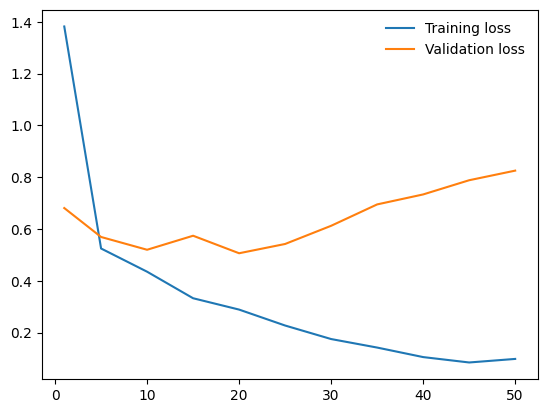

In [ ]:
pltLoss(net2_training_data)

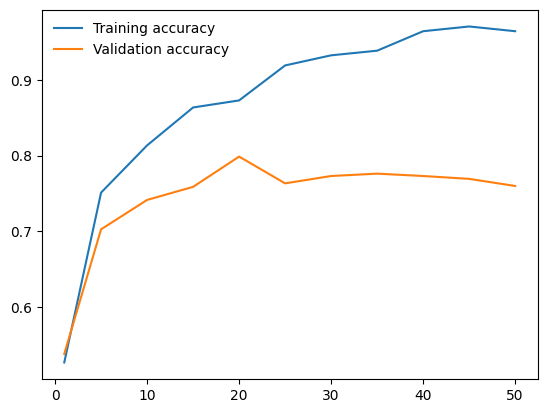

In [ ]:
pltAccuracy(net2_training_data)

In [ ]:
net2Result = validateNetwork(net2)

print(net2Result)

0.7598060344827586


In [ ]:
# Submit experiment 1 model
submission_df = submitNetwork(net2)

,filename,SEX
3,img_0003,1
4,img_0004,1
5,img_0005,0
6,img_0006,0
9,img_0009,0


Predictions saved to submission.csv


In [ ]:
# !kaggle competitions submit -c budl25 -f submission.csv -m 'dropout Submission'

## Experiment 2: Early stopping

**Rationale**: In the baseline model and the baseline + dropout layer model, the validation accuracy seemed to increase gradually up to epoch 20-30 and either stayed the same or got worse as the model's training accuracy increased up to 1. In order to find what the best parameters are in the epoch 20-30 range, I used an early stopping technique to store the parameters of the model when the model had the highest validation accuracy and lowest validation loss.

**Implementation**: I store the current validation accuracy when it evaluates itself on the validation data every 5 epochs. If the current validation accuracy is higher than the best validation accuracy or the model is training for the first time, then the current validation accuracy is stored in the best validation accuracy variable. Then we make a deep copy of the model's parameters at that time, and when the model is done training, we go back to when the model had the highest validation accuracy and what parameters it had at that time. So therefore, when we validate the network, we get the same validation accuracy as when the model recorded its highest validation accuracy at its best epoch.

**Results**: For the validation dataset, the baseline model achieved an accuracy of 0.76 with a loss of 1.308. The early stopping model achieved an accuracy of 0.77 with a loss of 0.0.74. For the training dataset, the baseline model achieved a training accuracy of 0.998 and a loss of 0.009. The early stopping model achieved an accuracy of 0.952 and a loss of 0.120. The F1 score of the baseline model was 0.736, and the early stopping model was 0.720.

**Analysis**: The early stopping model showed a significant improvement in validation accuracy as compared to the baseline's model. This is because as the model trains for longer and longer, the model starts to memorise patterns in the training data set rather than try and learn new patterns as it did in the first 15 epochs. This may be due to having a smaller dataset of images, as deep learning models are trained from scratch with 10k+ images, not including data augmentations.

Reference: https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html, https://milvus.io/ai-quick-reference/how-does-early-stopping-prevent-overfitting-in-deep-learning


In [ ]:
# Define Loss function and optimiser
# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Define model architecture

class CNN3(nn.Module):

  def __init__(self):
    super(CNN3, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x # Return raw logits for CrossEntropyLoss

net3 = CNN3()

print(net3)

CNN3(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7344, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
# Apply neural network to gpu
net3 = CNN3().to(device)
# Reinitialise weights
net3.apply(init_weights)

# Set the training parametres for trainNetwork()
net3TrainingConfig = TrainingConfig(
    model=net3,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net3.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Run Baseline CNN model
net3_training_data = trainNetworkEarlyStopping(net3TrainingConfig.model, net3TrainingConfig.epochs, net3TrainingConfig.loss_function, net3TrainingConfig.optimizer, net3TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 1.276.. Validation Loss: 0.654.. Training Accuracy: 0.568.. Validation Accuracy: 0.631
--> New best val acc: 0.631 at epoch 1
Epoch: 5/50.. Training Loss: 0.504.. Validation Loss: 0.589.. Training Accuracy: 0.765.. Validation Accuracy: 0.700
--> New best val acc: 0.700 at epoch 5
Epoch: 10/50.. Training Loss: 0.429.. Validation Loss: 0.541.. Training Accuracy: 0.786.. Validation Accuracy: 0.726
--> New best val acc: 0.726 at epoch 10
Epoch: 15/50.. Training Loss: 0.223.. Validation Loss: 0.559.. Training Accuracy: 0.924.. Validation Accuracy: 0.765
--> New best val acc: 0.765 at epoch 15
Epoch: 20/50.. Training Loss: 0.142.. Validation Loss: 0.767.. Training Accuracy: 0.947.. Validation Accuracy: 0.716
Epoch: 25/50.. Training Loss: 0.120.. Validation Loss: 0.740.. Training Accuracy: 0.952.. Validation Accuracy: 0.770
--> New best val acc: 0.770 at epoch 25
Epoch: 30/50.. Training Loss: 0.066.. Validation Loss: 

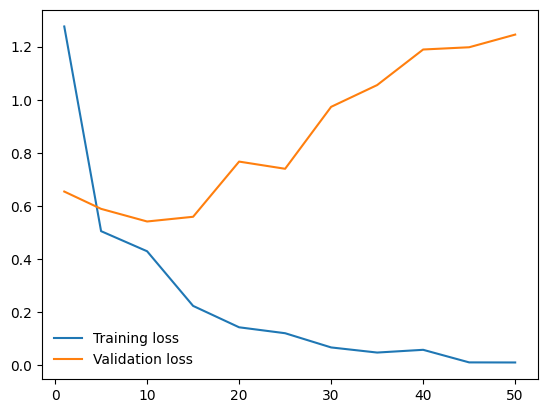

In [ ]:
pltLoss(net3_training_data)

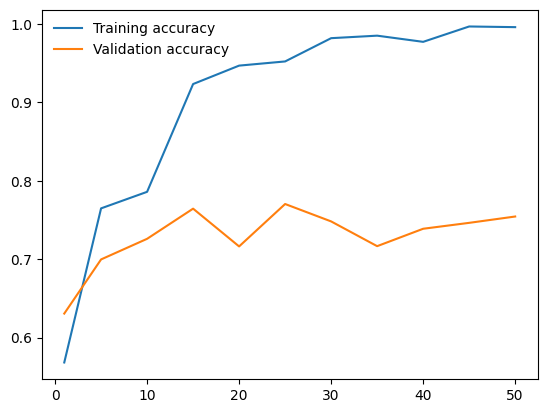

In [ ]:
pltAccuracy(net3_training_data)

In [ ]:
net3Result = validateNetwork(net3)

print(net3Result)

0.7704741379310345


In [ ]:
submission_df = submitNetwork(net3)

,filename,SEX
3,img_0003,1
4,img_0004,1
5,img_0005,0
6,img_0006,0
9,img_0009,0


Predictions saved to submission.csv


In [ ]:
#!kaggle competitions submit -c budl25 -f submission.csv -m 'early stopping Submission'

## Experiment 3 Batch normalisation 1d

**Rationale**: I noticed that in epochs 30-50 the validation loss was turbulent and not as stable as when the model was training between epochs 0-30, suggesting that the model was struggling to generalise consistently. Batch normalisation 1d should introduce stabilisation to the variance by adjusting the inputs to the next layer around zero and re-scaling them to a standard size. Batch normalisation 1D was added to the first connecting layer, as the vector from the flattening vector can have different scales across features. Batch normalisation 1D would help stabilise these activations, making training more stable and hopefully improving overfitting.

**Implementation**: I took the baseline CNN model and added an nn.BatchNorm1d(120) after the first connecting layer. In the forward function, x is computed by self.norm1(F.relu(self.fc1(x))) after the torch.flatten(x, 1) function. This leaves every other bit of the CNN architecture untouched, attributing any changes to the batch normalisation added to the first connecting layer.

**Results**: For the validation dataset, the baseline CNN model achieved an accuracy of 0.76 with a loss of 1.308, while the baseline + batchNorm1D achieved an accuracy of 0.702 with a loss of 1.583. For the training dataset, the baseline model achieved a training accuracy of 0.998 and a loss of 0.009, whereas the baseline + batchNorm1D model achieved a training accuracy of 0.997 and a loss of 0.015. The F1 score of the baseline model on the validation set was 0.736, compared to 0.629 for the baseline + batchNorm1D.

**Analysis**: The validation loss curve for the experiment model turned out to be much more chaotic and unstable than the hypothesis stated. The validation accuracy was much worse when the epoch was in the final epoch than in the experiment mode; however, in epoch 40 the validation accuracy was reported to be 0.805, which shows that there was a small improvement sometime during the later training of the model.

In [ ]:
# Define model architecture

class CNN4(nn.Module):

  def __init__(self):
    super(CNN4, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.norm1 = nn.BatchNorm1d(120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.norm1(F.relu(self.fc1(x))) # Added batch normalisation to first FC layer
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net4 = CNN4()

print(net4)

CNN4(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7344, out_features=120, bias=True)
  (norm1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
# Apply neural network to gpu
net4 = CNN4().to(device)
# Reinitialise weights
net4.apply(init_weights)

# Set the training parametres for trainNetwork()
net4TrainingConfig = TrainingConfig(
    model=net4,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net4.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Run Baseline CNN model
net4_training_data = trainNetwork(net4TrainingConfig.model, net4TrainingConfig.epochs, net4TrainingConfig.loss_function, net4TrainingConfig.optimizer, net4TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50..  Training Loss: 0.666..  Validation Loss: 0.609..  Training Accuracy: 0.636..  Validation Accuracy: 0.671
Epoch: 5/50..  Training Loss: 0.443..  Validation Loss: 0.499..  Training Accuracy: 0.788..  Validation Accuracy: 0.764
Epoch: 10/50..  Training Loss: 0.290..  Validation Loss: 0.552..  Training Accuracy: 0.884..  Validation Accuracy: 0.762
Epoch: 15/50..  Training Loss: 0.153..  Validation Loss: 0.633..  Training Accuracy: 0.944..  Validation Accuracy: 0.750
Epoch: 20/50..  Training Loss: 0.107..  Validation Loss: 0.796..  Training Accuracy: 0.967..  Validation Accuracy: 0.733
Epoch: 25/50..  Training Loss: 0.058..  Validation Loss: 1.020..  Training Accuracy: 0.981..  Validation Accuracy: 0.732
Epoch: 30/50..  Training Loss: 0.027..  Validation Loss: 1.019..  Training Accuracy: 0.992..  Validation Accuracy: 0.729
Epoch: 35/50..  Training Loss: 0.034..  Validation Loss: 1.269..  Training Accuracy: 0.991..  Validation Acc

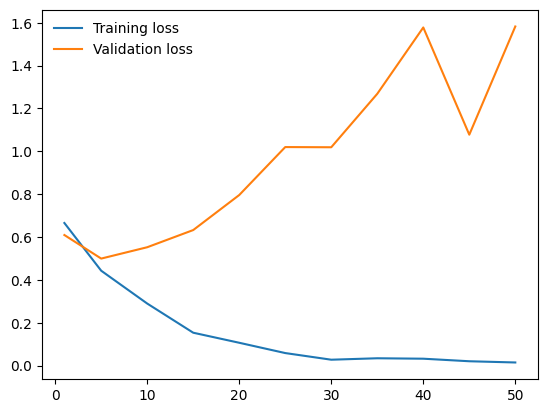

In [ ]:
pltLoss(net4_training_data)

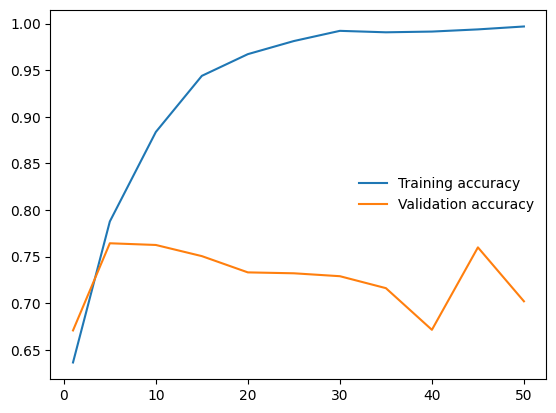

In [ ]:
pltAccuracy(net4_training_data)

In [ ]:
net4Result = validateNetwork(net4)

print(net4Result)

0.7019396551724137


In [ ]:
# submission_df = submitNetwork(net4)

In [ ]:
#!kaggle competitions submit -c budl25 -f submission.csv -m 'Batchnorm1d Submission'

## Experiment 4: Early Stopping + Dropout

**Rationale**: In experiment 1, the baseline + dropout layer and in experiment 2, the baseline + early stopping both showed great improvement in validation accuracy and a more stable validation accuracy curve. This means that the dropout layer helped the model to generalise and learn new patterns rather than memorise, and the early stopping technique found when the model had learnt all the new patterns it could rather than overtrain and memorise data.

In this experiment, I decided to combine both to see if we could improve on either of those experiments to find a better validation accuracy and f1 score.

**Implementation**: I added a dropout layer after the flatten layer, and I used the trainNetworkEarlyStopping() function, which copies the model's parameters when it has found a new all-time high validation accuracy every 5 epochs when it evaluates.

**Results**: For the validation dataset, the baseline model achieved an accuracy of 0.76 with a loss of 1.308, while the early stopping + dropout model achieved an accuracy of 0.829 with a loss of 0.717.

For the training dataset, the baseline model achieved a training accuracy of 0.988 and a loss of 0.009, whereas the experiment model achieved a training accuracy of 0.981 and a loss of 0.059. The F1 score of the baseline model on the validation set was 0.736, compared to 0.816 for the experiment model.

**Analysis**: The validation accuracy showed a significant increase as compared to the baseline model(0.76 to 0.829). That being said the validation accuracy did not show a significant change compared to the early stopping model or dropout layer model. For the early stopping + dropout model, the F1 score dropped compared to the baseline model (0.736 to 0.816). This could suggest that the model is now predicting one class more confidently than the other.

This shows that the current training dataset might be limited and augmentations to the dataset should be made to increase size and diversity of the dataset to see if improvements can be made to this configuration rather than additional regularisation.

In [ ]:
# Define Loss function and optimiser
# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Add dropout layer to combat overfitting from base model
# Define model architecture

class CNN5(nn.Module):

  def __init__(self):
    super(CNN5, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)

    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.dropout(x) # Dropout layer placed after flatten layer because parametres increase
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [ ]:
# Apply neural network to gpu
net5 = CNN5().to(device)
# Reinitialise weights
net5.apply(init_weights)

# Set the training parametres for trainNetwork()
net5TrainingConfig = TrainingConfig(
    model=net5,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net5.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Run Baseline CNN model
net5_training_data = trainNetworkEarlyStopping(net5TrainingConfig.model, net5TrainingConfig.epochs, net5TrainingConfig.loss_function, net5TrainingConfig.optimizer, net5TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 0.777.. Validation Loss: 0.643.. Training Accuracy: 0.594.. Validation Accuracy: 0.643
--> New best val acc: 0.643 at epoch 1
Epoch: 5/50.. Training Loss: 0.493.. Validation Loss: 0.516.. Training Accuracy: 0.767.. Validation Accuracy: 0.754
--> New best val acc: 0.754 at epoch 5
Epoch: 10/50.. Training Loss: 0.349.. Validation Loss: 0.455.. Training Accuracy: 0.853.. Validation Accuracy: 0.792
--> New best val acc: 0.792 at epoch 10
Epoch: 15/50.. Training Loss: 0.267.. Validation Loss: 0.414.. Training Accuracy: 0.886.. Validation Accuracy: 0.829
--> New best val acc: 0.829 at epoch 15
Epoch: 20/50.. Training Loss: 0.174.. Validation Loss: 0.491.. Training Accuracy: 0.929.. Validation Accuracy: 0.829
Epoch: 25/50.. Training Loss: 0.141.. Validation Loss: 0.489.. Training Accuracy: 0.954.. Validation Accuracy: 0.816
Epoch: 30/50.. Training Loss: 0.101.. Validation Loss: 0.642.. Training Accuracy: 0.960.. Valid

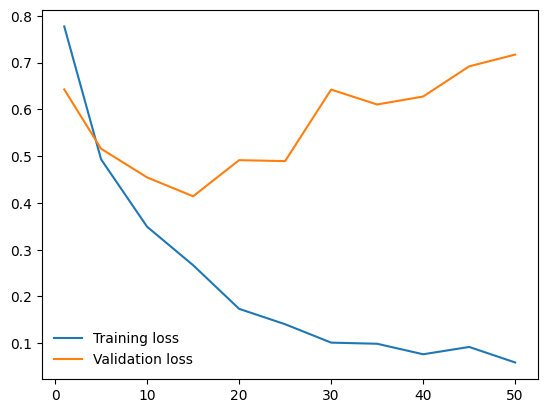

In [ ]:
pltLoss(net5_training_data)

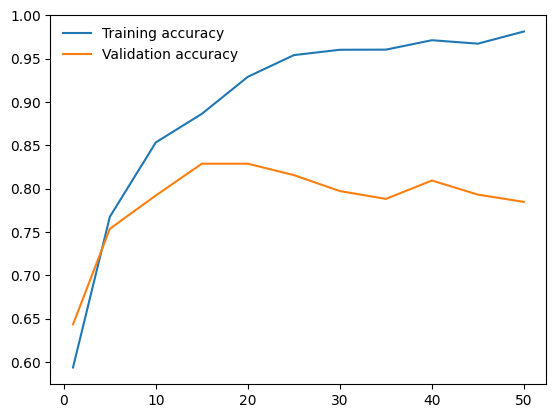

In [ ]:
pltAccuracy(net5_training_data)

In [ ]:
net5Result = validateNetwork(net5)

print(net5Result)

0.8286637931034482


In [ ]:
submission_df = submitNetwork(net5)

In [ ]:
#!kaggle competitions submit -c budl25 -f submission.csv -m 'dropout + Early stop Submission'

## Experiment 5: Increased Data augmentation(Random Erasing)

**Rationale**: Data augmentation would be another potential area to investigate, as the model may be overfitting due to a lack of diverse data. Apart from collecting more data, I can create variations of the images in the dataset so that way the model can learn new patterns, and it also helps to simulate real-life footprints. One way I can create variations of the images is via a technique known as Random Erasing, which is a data augmentation technique which randomly finds regions of the image in the dataset and erases the pixels with random values. Introduces levels of occlusion to the dataset, which helps the model learn new patterns and simulates a real-life footprint which may not always be as clear-cut as the training footprints.

**Implementation**: I made a copy of the transform instance and added transforms.RandomErasing() at the end of the instance, so therefore, after the images have been flipped, had colourjitter applied, been added to and been converted to a tensor, a random rectangular region in the image is erased with value 0, which will look like pure black to the model. Then a new dataset is created with the transformed values applied in order to augment the dataset.

**Results**: For the validation dataset, the baseline model achieved an accuracy of 0.76 with a loss of 1.308, while the baseline + random erasing model achieved an accuracy of 0.76 with a loss of 0.816.

For the training dataset, the baseline model achieved a training accuracy of 0.988 and a loss of 0.009, whereas the experiment model achieved a training accuracy of 0.947 and a loss of 0.142.

The F1 score of the baseline model on the validation set was 0.736, compared to 0.7 for the experiment model.

**Analysis**: Random erasing did not validation accuracy, it did decrease validation loss from 1.091 to 0.816, and the F1 score dropped from 0.736 to 0.7, showing that the model performed worse across the two classes. Interestingly, while data augmentation should help the model generalise instead of memorise, the exact opposite happened. Training accuracy decreased from 0.988 in the baseline model, to 0.947 in the experimental model, and the loss increased from 0.009 to 0.142. This implies that random erasing was not well-matched to the dataset despite having real-world applications, as footprints in real life may be covered by mud or another footprint. However, while random erasing was too aggressive, it may pair well with a dropout layer. Therefore, to avoid a local minima, I decided to explore random erasing further.

In [ ]:
# Create a new training dataset for experiment5
# Apply random erasion
train2_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomErasing( # Added Random erasing
        p=0.4,
        scale=(0.02, 0.33),
        ratio=(0.3, 3.3),
        value=0
    )
])

# Create new dataset
train2_ds = FootprintDataset(train_df.iloc[train_ixs], resized_folder, transform=train2_transform)

# Create data loader for data augmented training data
train2_loader = DataLoader(train2_ds, batch_size=bs,   shuffle=True)

In [ ]:
# Define model architecture

class CNN6(nn.Module):

  def __init__(self):
    super(CNN6, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
# Apply neural network to gpu
net6 = CNN6().to(device)
# Reinitialise weights
net6.apply(init_weights)

# Set the training parametres for trainNetwork()
net6TrainingConfig = TrainingConfig(
    model=net6,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net6.parameters(), lr=0.001),
    epochs=50,
    train_data = train2_loader
)

In [ ]:
# Run Model
net6_training_data = trainNetwork(net6TrainingConfig.model, net6TrainingConfig.epochs, net6TrainingConfig.loss_function, net6TrainingConfig.optimizer, net6TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50..  Training Loss: 0.839..  Validation Loss: 0.629..  Training Accuracy: 0.547..  Validation Accuracy: 0.662
Epoch: 5/50..  Training Loss: 0.512..  Validation Loss: 0.513..  Training Accuracy: 0.746..  Validation Accuracy: 0.767
Epoch: 10/50..  Training Loss: 0.395..  Validation Loss: 0.463..  Training Accuracy: 0.809..  Validation Accuracy: 0.766
Epoch: 15/50..  Training Loss: 0.282..  Validation Loss: 0.477..  Training Accuracy: 0.878..  Validation Accuracy: 0.789
Epoch: 20/50..  Training Loss: 0.240..  Validation Loss: 0.673..  Training Accuracy: 0.901..  Validation Accuracy: 0.783
Epoch: 25/50..  Training Loss: 0.231..  Validation Loss: 0.566..  Training Accuracy: 0.912..  Validation Accuracy: 0.793
Epoch: 30/50..  Training Loss: 0.141..  Validation Loss: 0.581..  Training Accuracy: 0.940..  Validation Accuracy: 0.798
Epoch: 35/50..  Training Loss: 0.117..  Validation Loss: 0.942..  Training Accuracy: 0.955..  Validation Acc

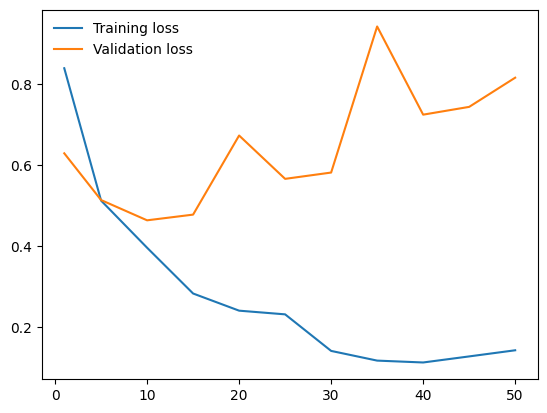

In [ ]:
pltLoss(net6_training_data)

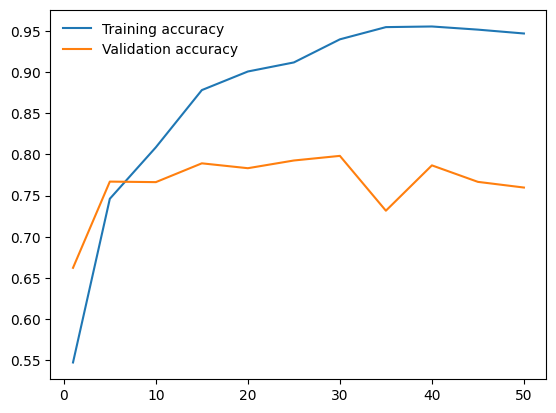

In [ ]:
pltAccuracy(net6_training_data)

In [ ]:
net6Result = validateNetwork(net6)

print(net6Result)

0.7598060344827586


In [ ]:
submission_df = submitNetwork(net6)

,filename,SEX
3,img_0003,1
4,img_0004,1
5,img_0005,0
6,img_0006,0
9,img_0009,0


Predictions saved to submission.csv


In [ ]:
#!kaggle competitions submit -c budl25 -f submission.csv -m 'Regular Erasion'

## **Experiment 6: Random Erasing + Dropout Layer**

**Rationale**: Seeing how the model coped with additional occlusion in which the model memorised patterns instead of learning new patterns. Perhaps a dropout layer after the flatten layer, which would have become much more variable with the increased noise from random erasing, will help regularise the dense features. This could aid the model in finding optimal weights and biases during backpropagation, as it won't over-rely on any particular subset of those dense features.

**Implementation**: I used the same dataset as the baseline model; however, I used the same transform composition values from the previous Random Erasing experiment. I also used the same dropout layer values and placement as the baseline + dropout layer model. The dropout values were set to 0.5, as the previous Random Erasing model showed extreme overfitting when the training accuracy reached >1.0. The dropout layer was added after the flatten layer. Every other layer and parameter of the model architecture was kept the same.

**Results**: For the validation dataset, the baseline model achieved an accuracy of 0.76 with a loss of 1.308, while the random erasing + dropout model achieved an accuracy of 0.803 with a loss of 0.597.

For the training dataset, the baseline model achieved a training accuracy of 0.998 and a loss of 0.009, whereas the experiment model achieved a training accuracy of 0.948 and a loss of 0.147. The F1 score of the baseline model on the validation set was 0.736, compared to 0.775 for the experiment model.

**Analysis**: The experimental model performed better in terms of validation accuracy than the baseline model (0.76 to 0.803), showing that the dropout layer did help. The F1 score was also better than the baseline model (0.736 to 0.775), even though training accuracy and loss remained strong at 0.948 accuracy and 0.147 loss. This shows that the dropout layer regularised the flatten layer and slightly helped generalisation. This could have been due to the dropout layer removing noise, so the model learnt patterns for correct classification of the footprints. As a result, using strong augmentations to the dataset in combination with the dropout layer did yield productive results.

In [ ]:
# Define model architecture

class CNN7(nn.Module):

  def __init__(self):
    super(CNN7, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.dropout(x) # Dropout layer placed after flatten layer because parametres increase
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x # Return raw logits for CrossEntropyLoss

In [ ]:
# Apply neural network to gpu
net7 = CNN7().to(device)
# Reinitialise weights
net7.apply(init_weights)

# Set the training parametres for trainNetwork()
net7TrainingConfig = TrainingConfig(
    model=net7,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net7.parameters(), lr=0.001),
    epochs=50,
    train_data = train2_loader
)

In [ ]:
# Run Model
net7_training_data = trainNetwork(net7TrainingConfig.model, net7TrainingConfig.epochs, net7TrainingConfig.loss_function, net7TrainingConfig.optimizer, net7TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50..  Training Loss: 0.655..  Validation Loss: 0.662..  Training Accuracy: 0.629..  Validation Accuracy: 0.600
Epoch: 5/50..  Training Loss: 0.524..  Validation Loss: 0.540..  Training Accuracy: 0.760..  Validation Accuracy: 0.735
Epoch: 10/50..  Training Loss: 0.393..  Validation Loss: 0.507..  Training Accuracy: 0.814..  Validation Accuracy: 0.757
Epoch: 15/50..  Training Loss: 0.324..  Validation Loss: 0.483..  Training Accuracy: 0.852..  Validation Accuracy: 0.783
Epoch: 20/50..  Training Loss: 0.252..  Validation Loss: 0.504..  Training Accuracy: 0.903..  Validation Accuracy: 0.805
Epoch: 25/50..  Training Loss: 0.233..  Validation Loss: 0.499..  Training Accuracy: 0.896..  Validation Accuracy: 0.793
Epoch: 30/50..  Training Loss: 0.196..  Validation Loss: 0.670..  Training Accuracy: 0.923..  Validation Accuracy: 0.777
Epoch: 35/50..  Training Loss: 0.211..  Validation Loss: 0.559..  Training Accuracy: 0.906..  Validation Acc

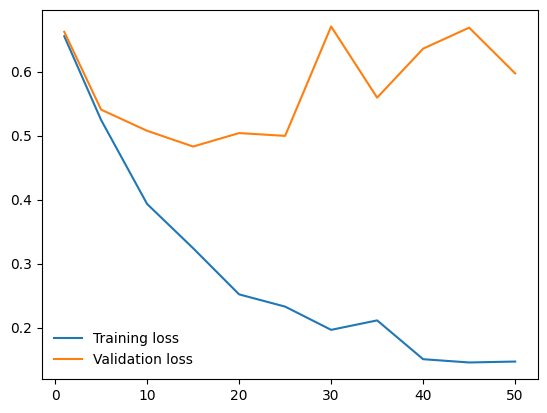

In [ ]:
pltLoss(net7_training_data)

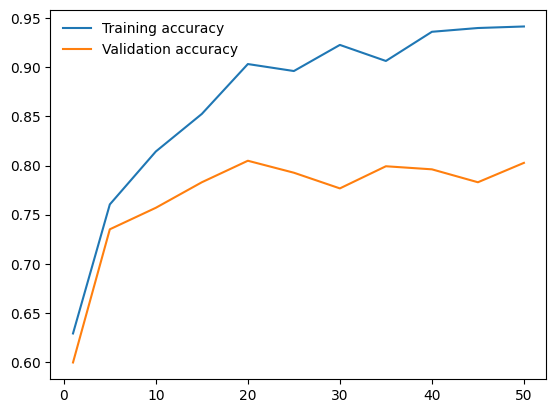

In [ ]:
pltAccuracy(net7_training_data)

In [ ]:
net7Result = validateNetwork(net7)

print(net7Result)

0.8026939655172413


In [ ]:
submission_df = validateNetwork(net7)

In [ ]:
#!kaggle competitions submit -c budl25 -f submission.csv -m 'Regular Erasion + Dropout Submission'

## Experiment 7: Random Erasion + Batch Norm 1d

**Rationale**: Exploring the idea that strong data augmentation could fix the model's tendency to overfit and seeing how the previous random erasing experiment showed a miniscule improvement in terms of validation accuracy and an increase in overfitting as shown in the training accuracy of 0.947 suggested that the increased noise made learning new patterns harder. However, batch normalisation would stabilise this extra noise so the model can cope better with an increased size in the dataset.

**Implementation:** I used the random erasure transforms instance for my train loader named 'train2_loader', and batch normalisation 1d was added to the first fully connected layer.

**Results:** For the validation dataset, the baseline model achieved an accuracy of 0.76 with a loss of 1.308, while the experimental model achieved an accuracy of 0.779 with a loss of 1.652.

For the training dataset, the baseline model achieved a training accuracy of 0.998 and a loss of 0.009, whereas the experiment model achieved a training accuracy of 0.959 and a loss of 0.097. The F1 score of the baseline model on the validation set was 0.736, compared to 0.739 in the experiment model.

**Analysis:** The experimental model performed marginally better than the baseline model in terms of validation accuracy but performed worse in terms of validation loss. Overfitting was still seen in the experimental model's training accuracy being 0.959 and loss being 0.097 as compared to the baseline's 0.998 and 0.009. This shows that the increased diversity of the dataset didn't help much.

In [ ]:
# Define model architecture

class CNN8(nn.Module):

  def __init__(self):
    super(CNN8, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.norm1 = nn.BatchNorm1d(120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.norm1(F.relu(self.fc1(x))) # Add batch normalisation to first FC layer
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net8 = CNN8()

print(net8)

CNN8(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7344, out_features=120, bias=True)
  (norm1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
# Define Loss function and optimiser
# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Apply neural network to gpu
net8 = CNN8().to(device)
# Reinitialise weights
net8.apply(init_weights)

# Set the training parametres for trainNetwork()
net8TrainingConfig = TrainingConfig(
    model=net8,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net8.parameters(), lr=0.001),
    epochs=50,
    train_data = train2_loader
)

Using device: cuda


In [ ]:
# Run Model
net8_training_data = trainNetwork(net8TrainingConfig.model, net8TrainingConfig.epochs, net8TrainingConfig.loss_function, net8TrainingConfig.optimizer, net8TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50..  Training Loss: 0.727..  Validation Loss: 0.577..  Training Accuracy: 0.628..  Validation Accuracy: 0.717
Epoch: 5/50..  Training Loss: 0.528..  Validation Loss: 0.507..  Training Accuracy: 0.750..  Validation Accuracy: 0.737
Epoch: 10/50..  Training Loss: 0.382..  Validation Loss: 0.491..  Training Accuracy: 0.834..  Validation Accuracy: 0.770
Epoch: 15/50..  Training Loss: 0.332..  Validation Loss: 0.475..  Training Accuracy: 0.867..  Validation Accuracy: 0.771
Epoch: 20/50..  Training Loss: 0.238..  Validation Loss: 0.745..  Training Accuracy: 0.911..  Validation Accuracy: 0.693
Epoch: 25/50..  Training Loss: 0.159..  Validation Loss: 0.739..  Training Accuracy: 0.938..  Validation Accuracy: 0.756
Epoch: 30/50..  Training Loss: 0.154..  Validation Loss: 1.065..  Training Accuracy: 0.941..  Validation Accuracy: 0.719
Epoch: 35/50..  Training Loss: 0.112..  Validation Loss: 0.731..  Training Accuracy: 0.952..  Validation Acc

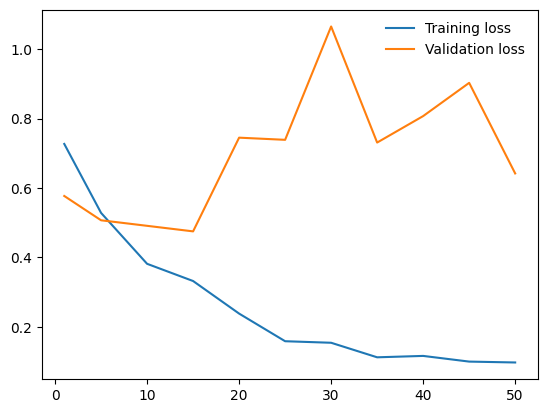

In [ ]:
pltLoss(net8_training_data)

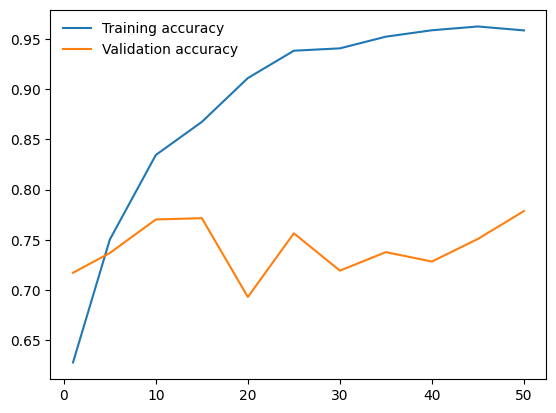

In [ ]:
pltAccuracy(net8_training_data)

In [ ]:
net8Result = validateNetwork(net8)

print(net8Result)

0.7785560344827587


## **Experiment 8 BatchNorm1d + Regular Erasion + Early Stopping**

**Rationale:** In the previous runs of this experiment, I sometimes had a higher validation accuracy in epochs 20-40, suggesting that the early stopping technique used in experiment 2 and 4 could help find the best parameters in a model.

**Implementation:** The early stopping technique I used creates a deep copy of the model's parameters when it finds a new all-time high validation accuracy. The first epoch will always store the model's parameters, and it will compare those parameters every 5 epochs until it finds itself a new all-time high validation accuracy and creates a copy of the model's state, which will be used for the validation function and for Kaggle.

**Results:** For the validation dataset, the baseline model achieved an accuracy of 0.760 with a loss of 1.308, while the experimental model achieved an accuracy of 0.775 with a loss of 0.855.

For the training dataset, the baseline model achieved a training accuracy of 0.998 and a loss of 0.009, whereas the experiment model achieved a training accuracy of 0.989 and a loss of 0.037. The F1 score of the baseline model on the validation set was 0.736, compared to 0.76 for the experiment model.

**Analysis:** This experiment found that the early stopping technique did in fact not find any epoch where the model had the highest validation accuracy; however, this may have been due to chance. That being said, I will keep early stopping as it serves to get the model's parameters when it is at the peak of its validation accuracy. In addition, the model may be prone to noise created by the diversity of the dataset, as random erasure is a very intrusive augmentation technique that can make validation performance less stable across epochs. Therefore, in my next experiment I will use a weaker, less intrusive data augmentation technique.

In [ ]:
# Define model architecture

class CNN9(nn.Module):

  def __init__(self):
    super(CNN9, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.norm1 = nn.BatchNorm1d(120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.norm1(F.relu(self.fc1(x))) # Added batch normalisation to first FC layer
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net9 = CNN9()

print(net9)

CNN9(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7344, out_features=120, bias=True)
  (norm1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
# Apply neural network to gpu
net9 = CNN9().to(device)
# Reinitialise weights
net9.apply(init_weights)

# Set the training parametres for trainNetwork()
net9TrainingConfig = TrainingConfig(
    model=net9,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net9.parameters(), lr=0.001),
    epochs=50,
    train_data = train2_loader
)

In [ ]:
# Run Model
net9_training_data = trainNetworkEarlyStopping(net9TrainingConfig.model, net9TrainingConfig.epochs, net9TrainingConfig.loss_function, net9TrainingConfig.optimizer, net9TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 0.668.. Validation Loss: 1.139.. Training Accuracy: 0.633.. Validation Accuracy: 0.465
--> New best val acc: 0.465 at epoch 1
Epoch: 5/50.. Training Loss: 0.502.. Validation Loss: 0.510.. Training Accuracy: 0.744.. Validation Accuracy: 0.755
--> New best val acc: 0.755 at epoch 5
Epoch: 10/50.. Training Loss: 0.381.. Validation Loss: 0.549.. Training Accuracy: 0.832.. Validation Accuracy: 0.726
Epoch: 15/50.. Training Loss: 0.274.. Validation Loss: 0.568.. Training Accuracy: 0.884.. Validation Accuracy: 0.735
Epoch: 20/50.. Training Loss: 0.205.. Validation Loss: 0.781.. Training Accuracy: 0.914.. Validation Accuracy: 0.716
Epoch: 25/50.. Training Loss: 0.180.. Validation Loss: 0.596.. Training Accuracy: 0.923.. Validation Accuracy: 0.763
--> New best val acc: 0.763 at epoch 25
Epoch: 30/50.. Training Loss: 0.133.. Validation Loss: 0.716.. Training Accuracy: 0.948.. Validation Accuracy: 0.757
Epoch: 35/50.. Tra

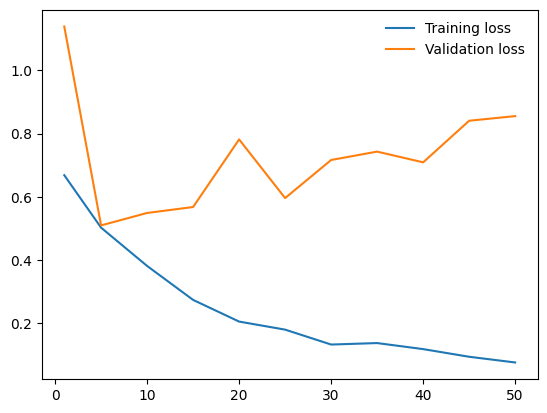

In [ ]:
pltLoss(net9_training_data)

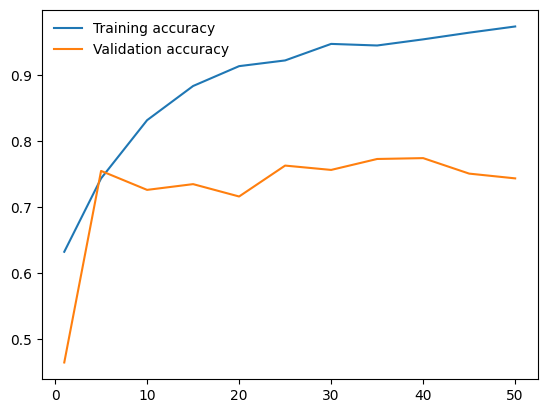

In [ ]:
pltAccuracy(net9_training_data)

In [ ]:
net9Result = validateNetwork(net9)

print(net9Result)

0.7745689655172414


## **Experiment 9 Small rotations + Batch normalisation 1d + Early Stopping**

**Rationale:** Random erasure is a realistic data augmentation, as footprints in real life won't always be picture-perfect as the original dataset due to external factors, and if the model is not trained to recognise patterns around the erased pixel area, it may have trouble with real-life forensic work; however, it is worth trying a weaker dataset augmentation to get a smaller, simpler model working.

**Implementation:** I created a new train loader, train3_loader, that has the same data augmentations as the baseline model but just with small rotations added via transforms. I also added batch normalisation to the first connecting layer, as in the previous experiments, and the early stopping technique to optimise for the best model's performance across the epochs.

**Results:** For the validation dataset, the baseline achieved an accuracy of 0.76 with a loss of 1.009, while the experimental model achieved an accuracy of 0.822 with a loss of 0.635.

For the training dataset, the baseline model achieved a training accuracy of 0.998 and a loss of 0.009, whereas the experiment model achieved a training accuracy of 0.962 and a loss of 0.110. The F1 score of the baseline model on the validation set was 0.736, compared to 0.805 for the experiment model.

**Analysis:** The experimental model did very well, as the small rotation data augmentation seemed to show that regular erasion was simply too invasive of a technique and considering the small image size of each footprint of 80 by 120 pixels, regular erasion most likely erased a big part of the foot shape, so the model struggled to predict a classification. The small rotations augmentation, increase the size of the dataset which could have given added noise in the data, batchnorm stabilised the variance after the first fully connecting layer.

In [ ]:
# Create a new training dataset for experiment5
# Apply rotation and random shade of gray scale
train3_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomRotation(degrees=(-10, 10))
])

# Create new dataset
train3_ds = FootprintDataset(train_df.iloc[train_ixs], resized_folder, transform=train3_transform)

# Create data loader for data augmented training data
train3_loader = DataLoader(train3_ds, batch_size=bs,   shuffle=True)

In [ ]:
# Define model architecture

class CNN10(nn.Module):

  def __init__(self):
    super(CNN10, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 120)
    self.norm1 = nn.BatchNorm1d(120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.norm1(F.relu(self.fc1(x))) # Added batch normalisation to first FC layer
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net10 = CNN10()

print(net9)

CNN9(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7344, out_features=120, bias=True)
  (norm1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
# Apply neural network to gpu
net10 = CNN10().to(device)
# Reinitialise weights
net10.apply(init_weights)

# Set the training parametres for trainNetwork()
net10TrainingConfig = TrainingConfig(
    model=net10,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net10.parameters(), lr=0.001),
    epochs=50,
    train_data = train3_loader
)

In [ ]:
# Run Model
net10_training_data = trainNetworkEarlyStopping(net10TrainingConfig.model, net10TrainingConfig.epochs, net10TrainingConfig.loss_function, net10TrainingConfig.optimizer, net10TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 0.345.. Validation Loss: 0.448.. Training Accuracy: 0.863.. Validation Accuracy: 0.803
--> New best val acc: 0.803 at epoch 1
Epoch: 5/50.. Training Loss: 0.293.. Validation Loss: 0.467.. Training Accuracy: 0.877.. Validation Accuracy: 0.799
Epoch: 10/50.. Training Loss: 0.260.. Validation Loss: 0.482.. Training Accuracy: 0.894.. Validation Accuracy: 0.782
Epoch: 15/50.. Training Loss: 0.228.. Validation Loss: 0.494.. Training Accuracy: 0.904.. Validation Accuracy: 0.801
Epoch: 20/50.. Training Loss: 0.209.. Validation Loss: 0.501.. Training Accuracy: 0.920.. Validation Accuracy: 0.819
--> New best val acc: 0.819 at epoch 20
Epoch: 25/50.. Training Loss: 0.168.. Validation Loss: 0.492.. Training Accuracy: 0.930.. Validation Accuracy: 0.812
Epoch: 30/50.. Training Loss: 0.155.. Validation Loss: 0.600.. Training Accuracy: 0.948.. Validation Accuracy: 0.793
Epoch: 35/50.. Training Loss: 0.166.. Validation Loss: 0.

In [ ]:
pltLoss(net10_training_data)

In [ ]:
pltAccuracy(net10_training_data)

In [ ]:
net10Result = validateNetwork(net10)

print(net10Result)

0.8217672413793103


## **Experiment 10: Shrink fully connected layers by half + early stop**

**Rationale:** After exploring regularisation, normalisation, data augmentation and early stopping. It may be worth looking at the model's architecture. As the model keeps overfitting, it may be because the fully connected layers are too big, and it would be worth shrinking them. This is because if we reduce the capacity of the classifiers, then we can also reduce memorisation capacity in the classifier head. I will keep the early stopping technique in this experiment, as it always shows a clear improvement, and I will shrink the fully connected layers down to a quarter.

**Implementation:** The first FC layer was reduced from 120 to 64; the second FC layer was reduced from 64 to 32. The third FC layer was reduced from 32 to 2. For every other part of the architecture, data augmentation was kept the same; however, I used my early stop method from earlier experiments.

**Results:** For the validation dataset, the baseline model achieved an accuracy of 0.76 with a loss of 1.309, while the experimental model achieved an accuracy of 0.777 with a loss of 1.025.

For the training dataset, the baseline model achieved a training accuracy of 0.998 and a loss of 0.009, whereas the experiment model achieved a training accuracy of 0.996 and a loss of 0.014. The F1 score of the baseline model on the validation set was 0.736, compared to 0.748 for the experiment model.

**Analysis:** The results show that the experimental model performed slightly better than the baseline model in terms of validation accuracy and F1 score; reducing the capacity of the FC layers helped generalisation. Even despite perfect training accuracy, the model's classifier still improved validation accuracy. The validation loss of the experimental model was slightly lower than the baseline. There was a steady rise in validation loss from epoch 0 to epoch 45, where the model hit its peak validation loss and then saw a slight decrease in validation loss as well as a slight increase in accuracy.

The early stopping technique caught the model's parameters before the big jump and saved them for later use.

In [ ]:
# Define model architecture

class CNN11(nn.Module):

  def __init__(self):
    super(CNN11, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 27 * 17, 64)
    #self.dropout = nn.Dropout(0.3)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    #x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
# Apply neural network to gpu
net11 = CNN11().to(device)
# Reinitialise weights
net11.apply(init_weights)

# Set the training parametres for trainNetwork()
net11TrainingConfig = TrainingConfig(
    model=net11,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(net11.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Run Model
net11_training_data = trainNetworkEarlyStopping(net11TrainingConfig.model, net11TrainingConfig.epochs, net11TrainingConfig.loss_function, net11TrainingConfig.optimizer, net11TrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 0.723.. Validation Loss: 0.596.. Training Accuracy: 0.624.. Validation Accuracy: 0.680
--> New best val acc: 0.680 at epoch 1
Epoch: 5/50.. Training Loss: 0.419.. Validation Loss: 0.537.. Training Accuracy: 0.808.. Validation Accuracy: 0.734
--> New best val acc: 0.734 at epoch 5
Epoch: 10/50.. Training Loss: 0.266.. Validation Loss: 0.596.. Training Accuracy: 0.889.. Validation Accuracy: 0.732
Epoch: 15/50.. Training Loss: 0.172.. Validation Loss: 0.634.. Training Accuracy: 0.938.. Validation Accuracy: 0.748
--> New best val acc: 0.748 at epoch 15
Epoch: 20/50.. Training Loss: 0.118.. Validation Loss: 0.667.. Training Accuracy: 0.963.. Validation Accuracy: 0.777
--> New best val acc: 0.777 at epoch 20
Epoch: 25/50.. Training Loss: 0.071.. Validation Loss: 0.740.. Training Accuracy: 0.980.. Validation Accuracy: 0.746
Epoch: 30/50.. Training Loss: 0.066.. Validation Loss: 0.822.. Training Accuracy: 0.978.. Valid

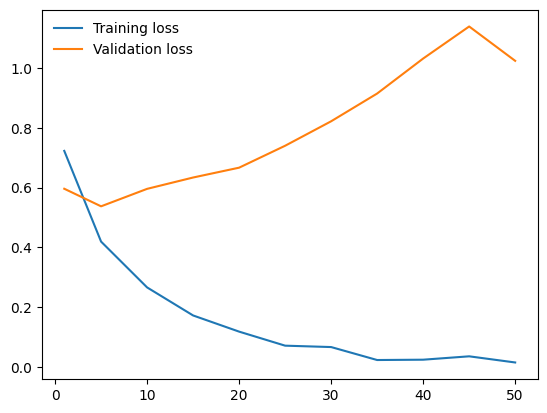

In [ ]:
pltLoss(net11_training_data)

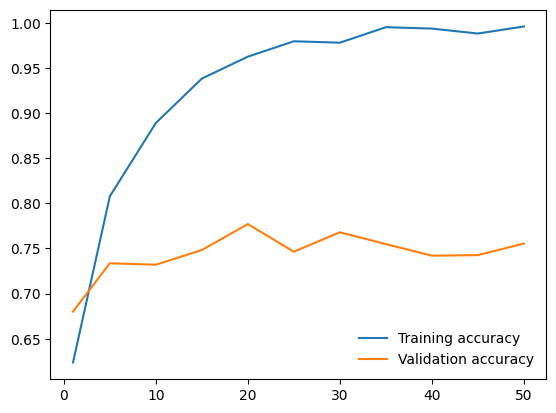

In [ ]:
pltAccuracy(net11_training_data)

In [ ]:
net11Result = validateNetwork(net11)

print(net11Result)

0.7770474137931035


In [ ]:
submissions_df = submitNetwork(net11)

,filename,SEX
3,img_0003,1
4,img_0004,1
5,img_0005,0
6,img_0006,0
9,img_0009,0


Predictions saved to submission.csv


In [ ]:
#!kaggle competitions submit -c budl25 -f submission.csv -m 'Add small rotations Submission'

## Plotting results

###**Validation Accuracy Chart**

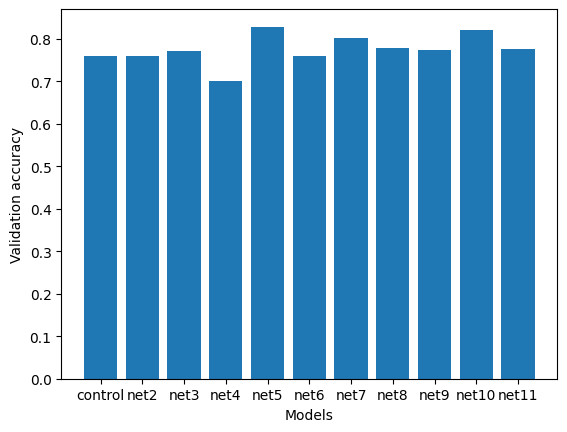

In [ ]:
# Add all results into array
results = [net1Result, net2Result, net3Result, net4Result, net5Result, net6Result, net7Result, net8Result, net9Result, net10Result, net11Result]
# Add labels to array
resultLabel = ['control', 'net2', 'net3', 'net4', 'net5', 'net6', 'net7', 'net8', 'net9',  'net10', 'net11']

plt.bar(resultLabel, results)
plt.xlabel('Models')
plt.ylabel("Validation accuracy")
plt.show()

### **Quantative table of variant model**

In [ ]:
import pandas as pd

summary_rows = [
    {"Model": ": Baseline CNN",
     "Change": "Baseline",
     "Hypothesis": "Provide benchmark",
     "Val Acc": 0.76,
     "Val F1": 0.736},

    {"Model": "1: + Dropout",
     "Change": "Add 0.5 dropout",
     "Hypothesis": "Reduce overfitting",
     "Val Acc": 0.759,
     "Val F1": 0.71},

    {"Model": "2: + Early Stopping",
     "Change": "Add early stopping",
     "Hypothesis": "Capture best model parameters",
     "Val Acc": 0.77,
     "Val F1": 0.72},

    {"Model": "3: + Batch Normalisation 1d",
     "Change": "Add batchnorm1d",
     "Hypothesis": "Introduce stabilisation",
     "Val Acc": 0.7,
     "Val F1": 0.629},

    {"Model": "4: + Early Stopping and Dropout layer",
     "Change": "+ Early stopping and dropout layer",
     "Hypothesis": "Dropout layer and early stopping proved to help",
     "Val Acc": 0.828,
     "Val F1": 0.816},

    {"Model": "5: Increase Augmentation",
     "Change": "Add regular erasion to dataset",
     "Hypothesis": "Increase size of dataset",
     "Val Acc": 0.75,
     "Val F1": 0.70},

    {"Model": "6: + Regular erasion + Dropout layer",
     "Change": "Increase size of dataset and add dropout layer",
     "Hypothesis": "Increase the size and deactivate neurones",
     "Val Acc": 0.802,
     "Val F1": 0.775},

    {"Model": "7: + Regular erasion + Batch Normalisation 1d",
     "Change": "Add regular erasion and batch norm1d",
     "Hypothesis": "Introduce stabilisation and increase size of data",
     "Val Acc": 0.778,
     "Val F1": 0.739},

    {"Model": "8: + Regular erasion + Batch Normalisation 1d + Early stopping",
     "Change": "Add regular erasion, batchnorm1d, early stopping",
     "Hypothesis": "Introduce stabilisation, augmentation and capture model's best weights",
     "Val Acc": 0.774,
     "Val F1": 0.765},

    {"Model": "9: + Small rotations + Batch Normalisation 1d + Early stopping",
     "Change": "Add small rotations, batchnorm1d, early stopping",
     "Hypothesis": "Less aggressive data augmentation",
     "Val Acc": 0.821,
     "Val F1": 0.805},

    {"Model": "10: + Shrink FC layers + Early stopping",
     "Change": "Shrink FC layers by half",
     "Hypothesis": "Shrink FC layers could reduce memorisation capacity",
     "Val Acc": 0.77,
     "Val F1": 0.748},
]

results_df = pd.DataFrame(summary_rows)
results_df


,Model,Change,Hypothesis,Val Acc,Val F1
0,: Baseline CNN,Baseline,Provide benchmark,0.760,0.736
1,1: + Dropout,Add 0.5 dropout,Reduce overfitting,0.759,0.710
2,2: + Early Stopping,Add early stopping,Capture best model parameters,0.770,0.720
3,3: + Batch Normalisation 1d,Add batchnorm1d,Introduce stabilisation,0.700,0.629
4,4: + Early Stopping and Dropout layer,+ Early stopping and dropout layer,Dropout layer and early stopping proved to help,0.828,0.816
5,5: Increase Augmentation,Add regular erasion to dataset,Increase size of dataset,0.750,0.700
6,6: + Regular erasion + Dropout layer,Increase size of dataset and add dropout layer,Increase the size and deactivate neurones,0.802,0.775
7,7: + Regular erasion + Batch Normalisation 1d,Add regular erasion and batch norm1d,Introduce stabilisation and increase size of data,0.778,0.739
8,8: + Regular erasion + Batch Normalisation 1d ...,"Add regular erasion, batchnorm1d, early stopping","Introduce stabilisation, augmentation and capt...",0.774,0.765
9,9: + Small rotations + Batch Normalisation 1d ...,"Add small rotations, batchnorm1d, early stopping",Less aggressive data augmentation,0.821,0.805


# **Section 6 Analysis XAI** #


## State-Of-The-Art model implementation

### ResNet 18 ##


In [ ]:
from torchvision import models
import torch.nn as nn

resnet18 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Freeze all parameters in the networks
for param in resnet18.parameters():
    param.requires_grad = False

# Unfreeze the fc layer/ classifier for training

for param in resnet18.fc.parameters():
    param.requires_grad = True

# Adapt the first convolutional layer for single-channel grayscale images
resnet18.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Replace the final fully connected layer for binary classification
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 2) # Output 2 classes (male/female)

# print(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 193MB/s]


In [ ]:
# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet18.to(device)

print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Set the training parametres for trainNetwork()
resnetTrainingConfig = TrainingConfig(
    model=resnet,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(resnet.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Run Model
resnet_training_data = trainNetworkEarlyStopping(resnetTrainingConfig.model, resnetTrainingConfig.epochs, resnetTrainingConfig.loss_function, resnetTrainingConfig.optimizer, resnetTrainingConfig.train_data)

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 0.722.. Validation Loss: 0.692.. Training Accuracy: 0.567.. Validation Accuracy: 0.548
--> New best val acc: 0.548 at epoch 1
Epoch: 5/50.. Training Loss: 0.600.. Validation Loss: 0.628.. Training Accuracy: 0.676.. Validation Accuracy: 0.666
--> New best val acc: 0.666 at epoch 5
Epoch: 10/50.. Training Loss: 0.543.. Validation Loss: 0.618.. Training Accuracy: 0.731.. Validation Accuracy: 0.655
Epoch: 15/50.. Training Loss: 0.522.. Validation Loss: 0.605.. Training Accuracy: 0.738.. Validation Accuracy: 0.692
--> New best val acc: 0.692 at epoch 15
Epoch: 20/50.. Training Loss: 0.509.. Validation Loss: 0.600.. Training Accuracy: 0.754.. Validation Accuracy: 0.701
--> New best val acc: 0.701 at epoch 20
Epoch: 25/50.. Training Loss: 0.519.. Validation Loss: 0.611.. Training Accuracy: 0.746.. Validation Accuracy: 0.733
--> New best val acc: 0.733 at epoch 25
Epoch: 30/50.. Training Loss: 0.482.. Validation Loss: 

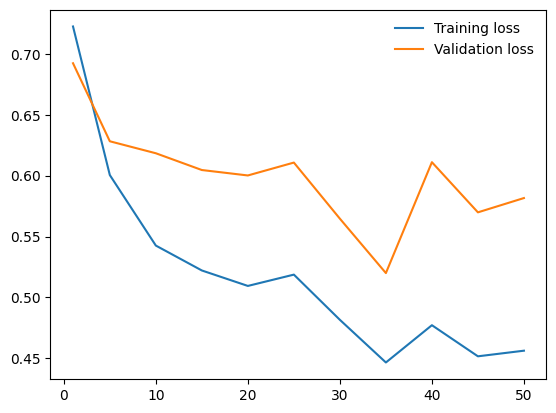

In [ ]:
pltLoss(resnet_training_data)

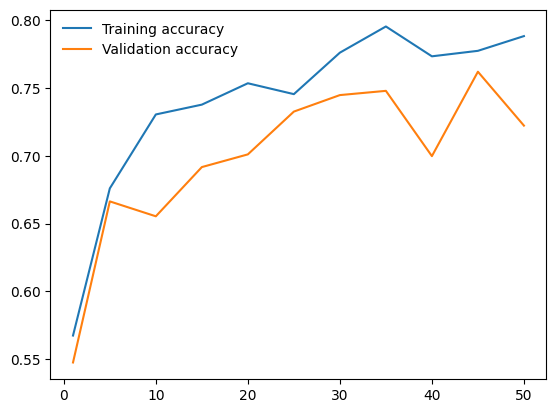

In [ ]:
pltAccuracy(resnet_training_data)

In [ ]:
resnetResult = validateNetwork(resnet)

print(resnetResult)

0.7620689655172413


### AlexNet ##

In [ ]:
from torchvision import models
import torch.nn as nn

# Import AlexNet
alexnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)

# Freeze parameters
for param in alexnet.parameters():
    param.requires_grad = False

# Adapt the first convolutional layer to work for 1 input, brightness
convo_layer = alexnet.features[0]
alexnet.features[0] = nn.Conv2d(
    1,                      # in_channels
    convo_layer.out_channels,  # 64
    kernel_size=convo_layer.kernel_size,
    stride=convo_layer.stride,
    padding=convo_layer.padding,
    bias=convo_layer.bias is not None,
)

# Replace the final fc layer
featuresNumber = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(featuresNumber, 2)

# Unfreeze only the new first conv and new classifier layer
for param in alexnet.features[0].parameters():
    param.requires_grad = True

for param in alexnet.classifier[6].parameters():
    param.requires_grad = True

print(alexnet)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 222MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet = alexnet.to(device)

print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Set the training parametres for trainNetwork()
alexnetTrainingConfig = TrainingConfig(
    model=alexnet,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(alexnet.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Run Model

alexnet.conv1 = alexnet.features[0]

alexnet_training_data = trainNetworkEarlyStopping(alexnetTrainingConfig.model, alexnetTrainingConfig.epochs, alexnetTrainingConfig.loss_function, alexnetTrainingConfig.optimizer, alexnetTrainingConfig.train_data)

# Optional: remove the temporary attribute after the call to clean up
del alexnet.conv1

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 0.698.. Validation Loss: 0.689.. Training Accuracy: 0.546.. Validation Accuracy: 0.612
--> New best val acc: 0.612 at epoch 1
Epoch: 5/50.. Training Loss: 0.640.. Validation Loss: 0.661.. Training Accuracy: 0.642.. Validation Accuracy: 0.618
--> New best val acc: 0.618 at epoch 5
Epoch: 10/50.. Training Loss: 0.584.. Validation Loss: 0.617.. Training Accuracy: 0.705.. Validation Accuracy: 0.678
--> New best val acc: 0.678 at epoch 10
Epoch: 15/50.. Training Loss: 0.536.. Validation Loss: 0.567.. Training Accuracy: 0.738.. Validation Accuracy: 0.719
--> New best val acc: 0.719 at epoch 15
Epoch: 20/50.. Training Loss: 0.527.. Validation Loss: 0.570.. Training Accuracy: 0.732.. Validation Accuracy: 0.722
--> New best val acc: 0.722 at epoch 20
Epoch: 25/50.. Training Loss: 0.511.. Validation Loss: 0.555.. Training Accuracy: 0.749.. Validation Accuracy: 0.722
--> New best val acc: 0.722 at epoch 25
Epoch: 30/50.. 

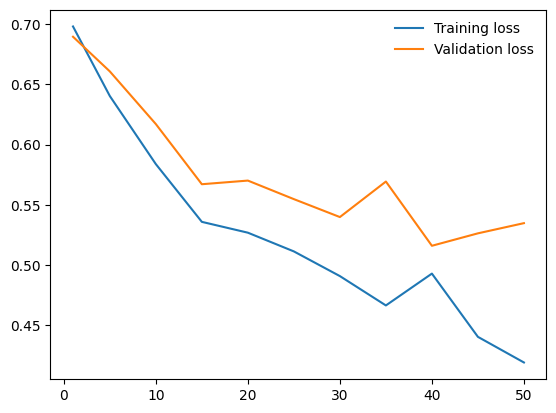

In [ ]:
pltLoss(alexnet_training_data)

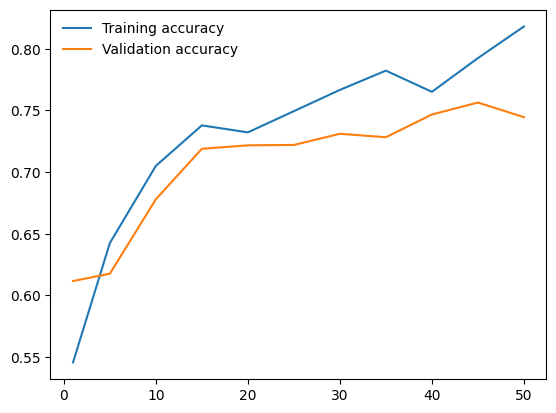

In [ ]:
pltAccuracy(alexnet_training_data)

In [ ]:
alexnetResult = validateNetwork(alexnet)

print(alexnetResult)

0.7563577586206897


### EffficientNet-B0 ##

In [ ]:
from torchvision import models
import torch.nn as nn
from torchvision.models import EfficientNet_B0_Weights

# Import EfficientNet
efficientnet = models.efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

# Freeze feature parameters
for param in efficientnet.features.parameters():
    param.requires_grad = False

# Adjust first convolutional layer to accept 1 channel, brightness
convo_layer = efficientnet.features[0][0]

# Replace with a 1-channel conv
efficientnet.features[0][0] = nn.Conv2d(
    1,                           # in_channels
    convo_layer.out_channels,       # typically 32
    kernel_size=convo_layer.kernel_size,
    stride=convo_layer.stride,
    padding=convo_layer.padding,
    bias=convo_layer.bias is not None
)

# Get the number of input features to the classifier
features_number = efficientnet.classifier[1].in_features

# Replace with a new Linear layer for 2 classes
efficientnet.classifier[1] = nn.Linear(features_number, 2)


print(efficientnet)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 142MB/s] 

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnetModel = efficientnet.to(device)

print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Set the training parametres for trainNetwork()
efficientnetModelTrainingConfig = TrainingConfig(
    model=efficientnetModel,
    loss_function=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(efficientnetModel.parameters(), lr=0.001),
    epochs=50,
    train_data = train_loader
)

In [ ]:
# Temporary workaround for trainNetwork function's print statement
# EfficientNet's first conv layer is efficientnet.features[0][0], not efficientnet.conv1
efficientnetModel.conv1 = efficientnetModel.features[0][0]

efficientnetModel_training_data = trainNetworkEarlyStopping(efficientnetModelTrainingConfig.model, efficientnetModelTrainingConfig.epochs, efficientnetModelTrainingConfig.loss_function, efficientnetModelTrainingConfig.optimizer, efficientnetModelTrainingConfig.train_data)

# Remove the temporary attribute after the call
del efficientnetModel.conv1

Model's first conv layer weight device: cuda:0
Epoch: 1/50.. Training Loss: 0.687.. Validation Loss: 0.743.. Training Accuracy: 0.567.. Validation Accuracy: 0.520
--> New best val acc: 0.520 at epoch 1
Epoch: 5/50.. Training Loss: 0.627.. Validation Loss: 0.599.. Training Accuracy: 0.644.. Validation Accuracy: 0.692
--> New best val acc: 0.692 at epoch 5
Epoch: 10/50.. Training Loss: 0.604.. Validation Loss: 0.572.. Training Accuracy: 0.670.. Validation Accuracy: 0.721
--> New best val acc: 0.721 at epoch 10
Epoch: 15/50.. Training Loss: 0.638.. Validation Loss: 0.569.. Training Accuracy: 0.648.. Validation Accuracy: 0.692
Epoch: 20/50.. Training Loss: 0.598.. Validation Loss: 0.644.. Training Accuracy: 0.677.. Validation Accuracy: 0.668
Epoch: 25/50.. Training Loss: 0.591.. Validation Loss: 0.625.. Training Accuracy: 0.688.. Validation Accuracy: 0.671
Epoch: 30/50.. Training Loss: 0.607.. Validation Loss: 0.650.. Training Accuracy: 0.678.. Validation Accuracy: 0.647
Epoch: 35/50.. Tra

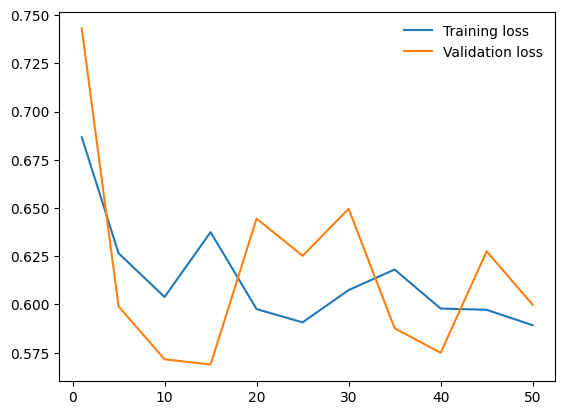

In [ ]:
pltLoss(efficientnetModel_training_data)

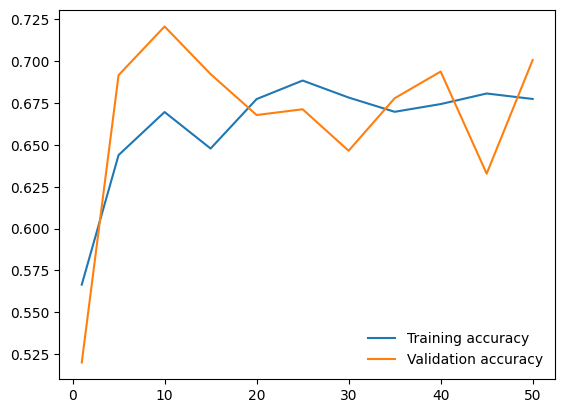

In [ ]:
pltAccuracy(efficientnetModel_training_data)

In [ ]:
efficientnetResults = validateNetwork(efficientnetModel)

## **Baseline and SOTA models performance on validation set** ##

In this project, I have explored the dataset for any potential imbalances in the footprint dataset that may affect the accuracy of the models. I have also implemented a baseline CNN model, analysed 3 state-of-the-art models as well as implemented them, and finally, up to this point, conducted 10 distinct experiments on the baseline CNN model.

In order to find the best model, we must compare all 4 models using a confusion matrix that will compare the true positives, false positives, true negatives, and false negatives that the models have classified from the validation dataset that is a 20% split of the labelled/training dataset that has no augmentations applied so that we can find which is the best model.

In [ ]:
# Functions for getting true positives, negatives and false positives and negatives

def get_true_positives(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    true_positives = np.sum((actual == 1) & (predicted == 1))
    return true_positives

def get_true_negatives(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    true_negatives = np.sum((actual == 0) & (predicted == 0))
    return true_negatives

def get_false_positives(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    false_positives = np.sum((actual == 0) & (predicted == 1))
    return false_positives

def get_false_negatives(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    false_negatives = np.sum((actual == 1) & (predicted == 0))
    return false_negatives


In [ ]:
# TP, TN, FP, FN stand for true positives, true negatives, false positives,
# false negatives

# Function to get accuracy
def get_accuracy(TP, TN, FP, FN):
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  return accuracy

# Function to get precisions
def get_precision(TP, FP):
  precision = TP / (TP + FP)
  return precision

# Function to get recall for class 1
def get_recall(TP, FN):
  recall = TP / (TP + FN)
  return recall

# Function to get F1 score
def get_f1_score(precision, recall):
  f1 = 2 * (precision * recall) / (precision + recall)
  return f1


In [ ]:
# Confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

def confusionMatrix(actual, predicted):
  model_confusion_matrix = confusion_matrix(actual, predicted)

  cm_display = ConfusionMatrixDisplay(confusion_matrix = model_confusion_matrix, display_labels = [0, 1])

  cm_display.plot()
  plt.show()

### Baseline model qualitative analysis ###

In [ ]:
# baseline true positives, negatives and false positives, negatives
baseline5_TP = get_true_positives(net5_training_data.actuals, net5_training_data.predictions)
baseline5_TN = get_true_negatives(net5_training_data.actuals, net5_training_data.predictions)
baseline5_FP = get_false_positives(net5_training_data.actuals, net5_training_data.predictions)
baseline5_FN = get_false_negatives(net5_training_data.actuals, net5_training_data.predictions)


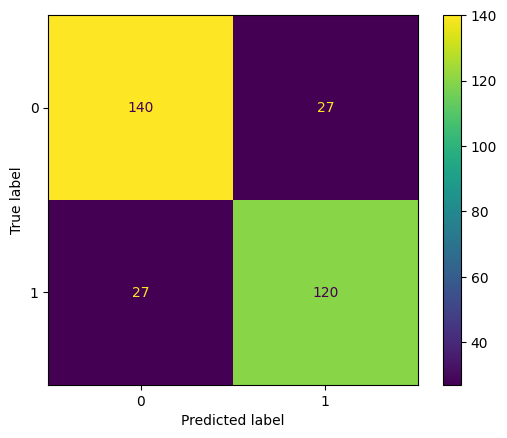

In [ ]:
# Confusion matrix for model
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

baseline5ConfusionMatrix = confusionMatrix(net5_training_data.actuals, net5_training_data.predictions)


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Accuracy of baseline5
baseline5_accuracy = get_accuracy(baseline5_TP, baseline5_TN, baseline5_FP, baseline5_FN)

# Precision of class 1
baseline5_precision = get_precision(baseline5_TP, baseline5_FP)

# Precision of class 0
baseline5_precision_class0 = precision_score(net5_training_data.actuals, net5_training_data.predictions, pos_label=0)

# Recall of class 1
baseline5_recall = get_recall(baseline5_TP, baseline5_FN)

# Recall of class 0
baseline5_recall_class0 = recall_score(net5_training_data.actuals, net5_training_data.predictions, pos_label=0)

# f1-score of class 1
baseline5_f1 = get_f1_score(baseline5_precision, baseline5_recall)

# F1-Score of class 0
baseline5_f1_class0 = f1_score(net5_training_data.actuals, net5_training_data.predictions, pos_label=0)

print(f"Accuracy: {baseline5_accuracy}")
print(f"Precision class 1: {baseline5_precision}")
print(f"Precision class 0: {baseline5_precision_class0}")
print(f"Recall class 1: {baseline5_recall}")
print(f"Recall class 0: {baseline5_recall_class0}")
print(f"F1 score class 1: {baseline5_f1}")
print(f"F1 score class 0: {baseline5_f1_class0}")

Accuracy: 0.8280254777070064
Precision class 1: 0.8163265306122449
Precision class 0: 0.8383233532934131
Recall class 1: 0.8163265306122449
Recall class 0: 0.8383233532934131
F1 score class 1: 0.8163265306122449
F1 score class 0: 0.8383233532934131


**Evaluation of Baseline+Early stopping + Dropout**

**Accuracy**

The experiment 4 variant of the baseline model had an accuracy of 0.828. Which shows that the model was correct in classifiying 83% of the validation footprints. The accuracy shows how correct the model was in predicting the the right class. As we can see in the confusion matrix, the model successfuly predicted 120 footprints as class 1 and predicted 140 footprints as 0. Showing that the model does well in predicting both classes in footprints.

**Precision**

The precision score of class 1 was 0.816, showing that when the model predicted class 1, the model was right 81% of the time.

The precision score of class 0 was 0.838, showing that when the model predicted class 0, the model was right 84% of the time.

Precision shows how correct the model was in predicting a classification.precision is especially useful when you have an imbalanced dataset, as precision can show how reliable the model is rather than just how accurate the model is at predicting data correctly. Our footprint training dataset is slightly imbalanced, as 845 footprint images in the training dataset that are labeled class 0 compared to 728 footprints classed as 1, meaning that the network could have trained itself to recognise generalise patterns of class 0 images better than class 1; Thebaseline variant experiment 4 model showed that pattern as the model was more precise in predicting footprints classed as 0 rather than class 1. Therefore, the model has learnt to classify class 0 footprints better.

**Recall**

The recall score of class 1 was 0.816.

The recall score of class 0 was 0.838.

Recall shows, for a given class, what proportion of the footprint images that truly belong to that class the model correctly predicts as that class instead of classifying them as another class. Recall is useful when the cost of a false negative is high. For example, for the footprint images, if class 1 is female and class 0 is male, lower recall for class 1 means that many true female footprints would be classed as male footprints, which could lead to investigators wrongfully investigating males rather than females.

**F1-Score**

The F1-Score of class 1 was 0.816.

The F1-Score of class 0 was 0.838.

The F1 score how precise the model is, meaning how correct the model was classifying a image and how well the model can recall that image as its true class rather than misclassyfying the image as the wrong class.

The slightly higher F1 score of class 0 could be due to the slight imbalance of training images in the favour of class 0.

The macro-average F1 score calculated as F1= (F1_class1 + F1_class0) / 2, shows that the macro-average F1 score of the baseline experiment 4 variant is the following:

0.818 + 0.830 =  1.654
1.648 / 2 = 0.827.

Macro-average is 0.827.

### ResNet 18 Qualitative Analysis

In [ ]:
# Resnet true positives, negatives and false positives, negatives
resnet_TP = get_true_positives(resnet_training_data.actuals, resnet_training_data.predictions)
resnet_TN = get_true_negatives(resnet_training_data.actuals, resnet_training_data.predictions)
resnet_FP = get_false_positives(resnet_training_data.actuals, resnet_training_data.predictions)
resnet_FN = get_false_negatives(resnet_training_data.actuals, resnet_training_data.predictions)


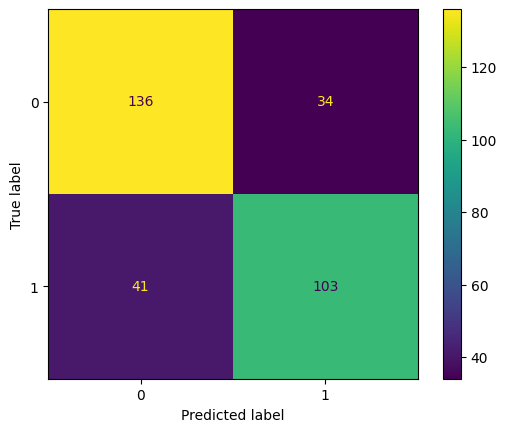

In [ ]:
# Confusion matrix for ResNet 18
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

resnetConfusionMatrix = confusionMatrix(resnet_training_data.actuals, resnet_training_data.predictions)


In [ ]:
# Accuracy of ResNet
resnet_accuracy = get_accuracy(resnet_TP, resnet_TN, resnet_FP, resnet_FN)

# Precision of class 1
resnet_precision = get_precision(resnet_TP, resnet_FP)

# Precision of class 0
resnet_precision_class0 = precision_score(resnet_training_data.actuals, resnet_training_data.predictions, pos_label=0)

# Recall of class 1
resnet_recall = get_recall(resnet_TP, resnet_FN)

# Recall of class 0
resnet_recall_class0 = recall_score(resnet_training_data.actuals, resnet_training_data.predictions, pos_label=0)

# F1-score of class 1
resnet_f1 = get_f1_score(resnet_precision, resnet_recall)

# F1-Score of class 0
resnet_f1_class0 = f1_score(resnet_training_data.actuals, resnet_training_data.predictions, pos_label=0)


print(f"Accuracy: {resnet_accuracy}")
print(f"Precision class 1: {resnet_precision}")
print(f"Precision class 0: {resnet_precision_class0}")
print(f"Recall: {resnet_recall}")
print(f"Recall class 0: {resnet_recall_class0}")
print(f"F1 score class 1: {resnet_f1}")
print(f"F1 score class 0: {resnet_f1_class0}")

Accuracy: 0.7611464968152867
Precision class 1: 0.7518248175182481
Precision class 0: 0.768361581920904
Recall: 0.7152777777777778
Recall class 0: 0.8
F1 score class 1: 0.7330960854092526
F1 score class 0: 0.7838616714697406


**Evaluation of ResNet 18**

The accuracy was 0.761. ResNet 18 correctly identified 76% of footprint images as their respective class, meaning the model's prediction is better than class; however, accuracy can be skewed by an imbalanced dataset. Therefore, we must investigate the precision, recall and F1 score of both classes to see the big picture.

The precision of predicting class 1 was 0.751.

The precision of predicting class 0 was 0.768.

ResNet 18 precision of predicting class 1 was slightly lower than class 0. Meaning that if class 1 is male, then the model has a harder time classifying a footprint image as correctly male so therefore, females would be more likely to be investigated.

The recall of class 1 images were 0.715.

The recall of class 0 images were 0.8.

The higher recall of class 0 may be due to the model learning the patterns for class 0 better than class 1, perhaps due to subtle differences in the image differences.

The F1 score of class 1 was 0.733.

The F1 score of class 0 was 0.78.

The F1 score of both classes were showed that the imbalanced dataset did favour class 0..

The macro average F1 score is:

(0.733 + 0.78) / 2 =  0.756

While the macro average F1 score for the model is much better than chance, looking at the differences in precision and recall in the classes shows that the model discriminates against class 1, therefore footprints are more likely to be labeled as class 0 which would mean that more women would be investigated. ResNet 18 will not be my final model.

### AlexNet Qualitative Analysis ###

In [ ]:
# alexnet true positives, negatives and false positives, negatives
alexnet_TP = get_true_positives(alexnet_training_data.actuals, alexnet_training_data.predictions)
alexnet_TN = get_true_negatives(alexnet_training_data.actuals, alexnet_training_data.predictions)
alexnet_FP = get_false_positives(alexnet_training_data.actuals, alexnet_training_data.predictions)
alexnet_FN = get_false_negatives(alexnet_training_data.actuals, alexnet_training_data.predictions)


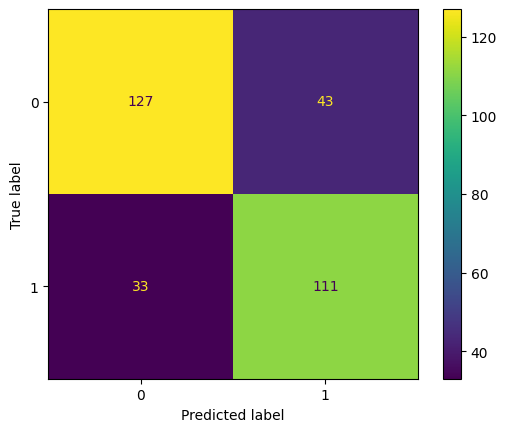

In [ ]:
# Confusion matrix for AlexNet
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

alexnetConfusionMatrix = confusionMatrix(alexnet_training_data.actuals, alexnet_training_data.predictions)

In [ ]:
# Accuracy of alexnet
alexnet_accuracy = get_accuracy(alexnet_TP, alexnet_TN, alexnet_FP, alexnet_FN)

# Precision of class 1
alexnet_precision = get_precision(alexnet_TP, alexnet_FP)

# Precision of class 0
alexnet_precision_class0 = precision_score(alexnet_training_data.actuals, alexnet_training_data.predictions, pos_label=0)

# Recall of class 1
alexnet_recall = get_recall(alexnet_TP, alexnet_FN)

# Recall of class 0
alexnet_recall_class0 = recall_score(alexnet_training_data.actuals, alexnet_training_data.predictions, pos_label=0)

# F1-Score of class 1
alexnet_f1 = get_f1_score(alexnet_precision, alexnet_recall)

# F1-Score of class 0
alexnet_f1_class0 = f1_score(alexnet_training_data.actuals, alexnet_training_data.predictions, pos_label=0)

print(f"Accuracy: {alexnet_accuracy}")
print(f"Precision class 1: {alexnet_precision}")
print(f"Precision class 0: {alexnet_precision_class0}")
print(f"Recall: {alexnet_recall}")
print(f"Recall class 0: {alexnet_recall_class0}")
print(f"F1 score class 1: {alexnet_f1}")
print(f"F1 score class 0: {alexnet_f1_class0}")

Accuracy: 0.7579617834394905
Precision class 1: 0.7207792207792207
Precision class 0: 0.79375
Recall: 0.7708333333333334
Recall class 0: 0.7470588235294118
F1 score class 1: 0.7449664429530202
F1 score class 0: 0.7696969696969697


**Evaluation of AlexNet**

The accuracy was 0.757. The model identified footprints as their respective class 76% of the time.

The precision of class 1 was 0.72.

The precision of class 0 was 0.793.

The precision as with ResNet, showed a siginificant gap between the precision of correctly classifying images into both classes. As the dataset is slightly balanced in favour of class 0, bigger networks with more parameters such as ResNet and AlexNet may be learning new patterns more efficiently with a larger dataset rather than a smaller dataset, resulting in the model predicting the number of class 0 images more often.

The recall of class 1 was 0.777.

The recall of class 0 was 0.747.

The recall was greater for class 1 than it was for class 0 as the model was more conservative in classifying images as class 0. Therefore, the model was able to classifiy images that were class 1 correctly; however, this reduces the precision for that classification. Suggesting that if class 1 is male, then the model will be more likely to classify more male footprints but it will also misclassify some class 0/female footprints as male.

F1 score of class 1 was 0.744.

F1 score of class 0 was 0.769.

Macro-average F1 score of the model was: (0.744 + 0.769) / 2 =  0.756. The macro-average F1 score shows that the model while still doing better than chance, is still not definitive of exactly which sex of subject to look into if footprints are found at the crime scene and classified as the model. In addition there is a slight bias towards class 1/male classification, resulting in more false positives for male and more men being interviewed based on footprint evidence alone.


### EfficientNet Qualitative Analysis ###

In [ ]:
# efficientnet true positives, negatives and false positives, negatives
efficientnet_TP = get_true_positives(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions)
efficientnet_TN = get_true_negatives(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions)
efficientnet_FP = get_false_positives(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions)
efficientnet_FN = get_false_negatives(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions)


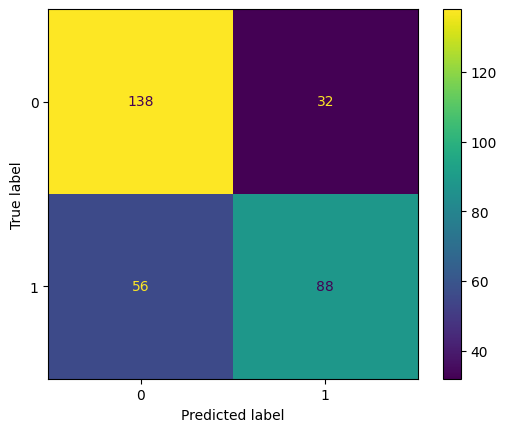

In [ ]:
# Confusion matrix for baseline model
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

efficientnetConfusionMatrix = confusionMatrix(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions)


In [ ]:
# Accuracy of efficientnet
efficientnet_accuracy = get_accuracy(efficientnet_TP, efficientnet_TN, efficientnet_FP, efficientnet_FN)

# Precision of class 1
efficientnet_precision = get_precision(efficientnet_TP, efficientnet_FP)

# Precision of class 0
efficientnet_precision_class0 = precision_score(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions, pos_label=0)

# Recall of class 1
efficientnet_recall = get_recall(efficientnet_TP, efficientnet_FN)

# Recall of class 0
efficientnet_recall_class0 = recall_score(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions, pos_label=0)

# F1-score of class 1
efficientnet_f1 = get_f1_score(efficientnet_precision, efficientnet_recall)

# F1-Score of class 0
efficientnet_f1_class0 = f1_score(efficientnetModel_training_data.actuals, efficientnetModel_training_data.predictions, pos_label=0)

print(f"Accuracy: {efficientnet_accuracy}")
print(f"Precision class 1: {efficientnet_precision}")
print(f"Precision class 0: {efficientnet_precision_class0}")
print(f"Recall: {efficientnet_recall}")
print(f"Recall class 0: {efficientnet_recall_class0}")
print(f"F1 score class 1: {efficientnet_f1}")
print(f"F1 score class 0: {efficientnet_f1_class0}")

Accuracy: 0.7197452229299363
Precision class 1: 0.7333333333333333
Precision class 0: 0.711340206185567
Recall: 0.6111111111111112
Recall class 0: 0.8117647058823529
F1 score class 1: 0.6666666666666666
F1 score class 0: 0.7582417582417582


**EfficientNet-B0**

The accuracy of EfficientNet-B0 was 0.719 or in other words, the model was correctly in identifying 72% of footprints.

Precision of class 1 was 0.733.

Precision of class 0 was 0.711.

The precison shows a smaller yet noticable gap between the model's classifiers; however, the gap is smaller than ResNet 18 and AlexNet which suggests that EfficientNet-B0 smaller parameter count may act as a form of regularisation, helping it learn patterns of both classifications and reducing bias towards one class than another.

The recall of class 1 was 0.611.

The recall of class 0 was 0.811.

The recall was much worse for class 1 than it was for class 0, suggesting that the model requires data augmentation to increase the size of the dataset..

The F1 score for class 1 was 0.66.

The F1 score for class 0 was 0.75.

Macro-average F1 score was: (0.66 + 0.75) / 2 =  0.705.

Although, the validation accuracy was only 73%, as the macro-average F1 score is similar to the validation accuracy, the model is more biased towards class 0, due to its higher recall rate than ResNet 18 or AlexNet.

**Comparison of Baseline variant with SOTA models**

In [ ]:
8import pandas as pd

summary_rows = [
    {"Model": "Baseline CNN",
     "Accuracy": 0.828,
     "Precision Class 1": 0.816,
     "Precision Class 0": 0.838,
     "Recall Class 1": 0.816,
     "Recall Class 0": 0.838,
     "F1 Score Class 1": 0.816,
     "F1 Score Class 0": 0.838,
     "Macro-Average F1 Score": 0.827,},

    {"Model": "ResNet18",
     "Accuracy": 0.761,
     "Precision Class 1": 0.75,
     "Precision Class 0": 0.76,
     "Recall Class 1": 0.71,
     "Recall Class 0": 0.8,
     "F1 Score Class 1": 0.733,
     "F1 Score Class 0": 0.783,
     "Macro-Average F1 Score": 0.756,},

    {"Model": "AlexNet",
     "Accuracy": 0.757,
     "Precision Class 1": 0.72,
     "Precision Class 0": 0.79,
     "Recall Class 1": 0.77,
     "Recall Class 0": 0.747,
     "F1 Score Class 1": 0.744,
     "F1 Score Class 0": 0.769,
     "Macro-Average F1 Score": 0.769,},

    {"Model": "EfficientNet-B0",
     "Accuracy": 0.719,
     "Precision Class 1": 0.733,
     "Precision Class 0": 0.71,
     "Recall Class 1": 0.61,
     "Recall Class 0": 0.81,
     "F1 Score Class 1": 0.66,
     "F1 Score Class 0": 0.75,
     "Macro-Average F1 Score": 0.705,}]

results_df = pd.DataFrame(summary_rows)
results_df


,Model,Accuracy,Precision Class 1,Precision Class 0,Recall Class 1,Recall Class 0,F1 Score Class 1,F1 Score Class 0,Macro-Average F1 Score
0,Baseline CNN,0.828,0.816,0.838,0.816,0.838,0.816,0.838,0.827
1,ResNet18,0.761,0.750,0.760,0.710,0.800,0.733,0.783,0.756
2,AlexNet,0.757,0.720,0.790,0.770,0.747,0.744,0.769,0.769
3,EfficientNet-B0,0.719,0.733,0.710,0.610,0.810,0.660,0.750,0.705


## Final Model XAI ##

**Final Model**

For my final model that I will be submitting to the Kaggle competition and what I would deploy as a deep learning engineer to classify footprints, it will be my baseline + early stopping + dropout layer model. The reason being is that the macro-average F1 score (0.828) was the highest out of all 4 models trained and also had the most trustworthy classifications. However, in order to deploy the model in a real forensic environment where its predictions may lead to an innocent person being arrested, we must first be able to explain how it made its decision to the best of our ability, also known as XAI or explainable AI.

One trade-off that the baseline + early stopping + dropout layer variant model may bring is the small architecture. For example, while the model performed better than the state-of-the-art models, that was very likely due to the small size of the footprint dataset, not necessarily due to the architecture design. A bigger footprint dataset with enhanced augmentation trained on the SOTA models would likely surpass my model massively. However, for this project, I will choose the baseline variant as my final model.

### **Grad-CAM** ###

Explainable AI helps us understand how an AI or neural network gave a prediction. While neural networks are thought of as being 'black boxes', as in we can't see how the model classified an input, what we can do is use an XAI technique to help us see where the model found patterns (Ramprasaath R. Selvaraju et al, 2017).

One such technique is known as Grad-CAM, or Gradient-weighted Class Activation Map. Grad-CAM creates heatmaps that visually show where and what regions the model was focusing on to make a prediction. It uses gradients flowing into the last convolutional layer to highlight regions that the model was focusing on (Ramprasaath R. Selvaraju et al, 2017).

For the baseline variant model, the model was set to evaluation mode, where the dropout layer was disabled and so were the gradient computations so that the model predicted footprints from the validation set without updating any of its parameters.

All footprints from the validation set that propagated through the model had their loss values recorded as well as the index, which were stored in a dataframe. The 5 images that had the highest loss were stored in a separate dataframe (high_loss_images).

The dataframe that contained the images with the highest loss values was then found via their file path, and they were converted into a tensor and resized as well as had 3 copies of the same image stacked so that it could fit 3 channels.

Grad-CAM was initialised with the second convolutional layer as the target layer, and the input tensors or footprint images with the highest loss values were computed. The heatmaps were then overlaid with the original image, and their actual and predicted values were given, with the original image and the heatmap image printed alongside each other (Ramprasaath R. Selvaraju et al, 2017).

In [ ]:
# Install Grad-CAM
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=f4e40ab2870795ce388be96ee1b5cb9096383cc66aedc224947780bd069ddc66
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [ ]:
# Install visualisations
!pip install grad-cam opencv-python matplotlib

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [ ]:
# Set network to evaluate mode and get target layer
net5.eval()
target_layer = net5.conv2

In [ ]:
# Find 6 images with the worst loss
loss_records = []
criterion = nn.CrossEntropyLoss(reduction='none')

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(valid_loader):
        images = images.to(device) # Move images to the correct device
        labels = labels.to(device) # It's good practice to move labels too, for consistency if they were used for loss on device
        outputs = net5(images)
        losses = criterion(outputs, labels)

        for i, loss_value in enumerate(losses):
            img_idx = batch_idx * valid_loader.batch_size + i
            loss_records.append({
                'image_index': img_idx,
                'loss': loss_value.item(),
                'predicted': outputs[i].argmax().item(),
                'actual': labels[i].item()
            })

df_losses = pd.DataFrame(loss_records)

high_loss_images = df_losses.nlargest(5, 'loss')

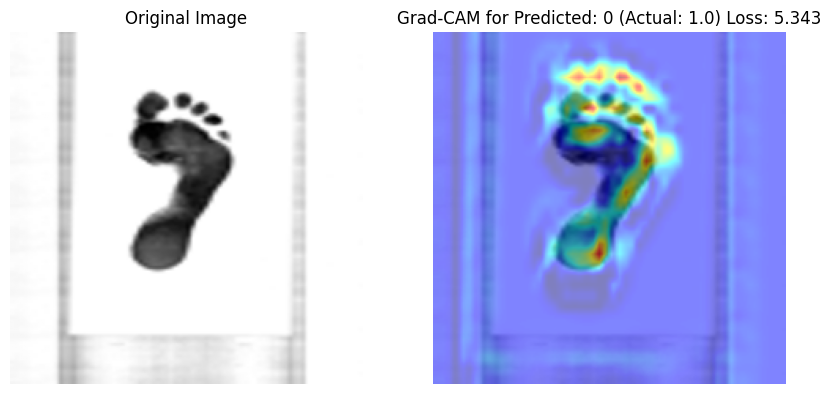

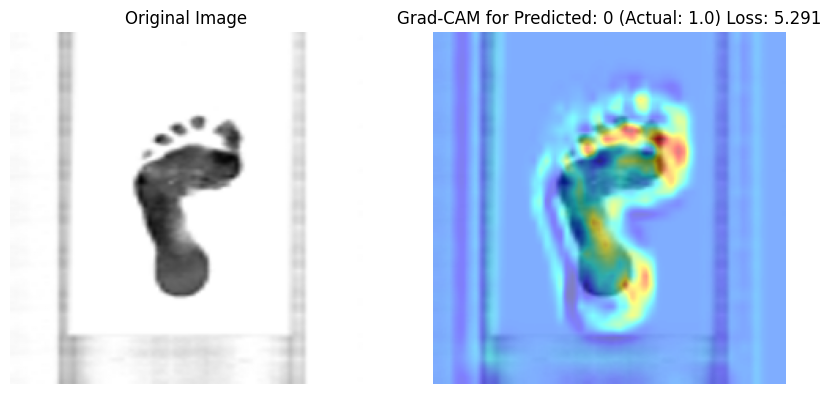

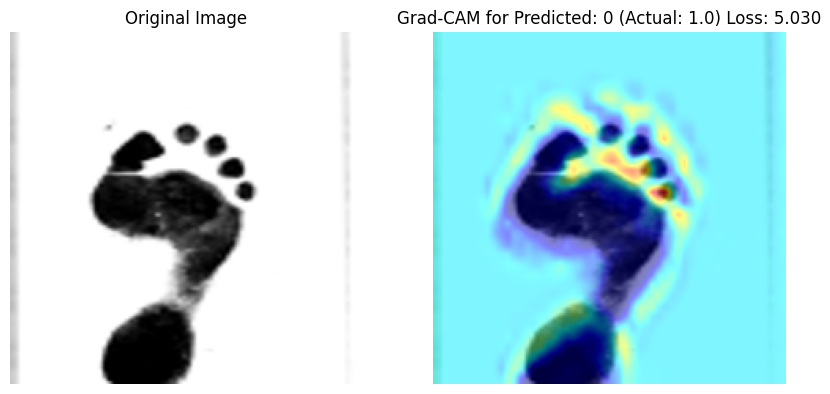

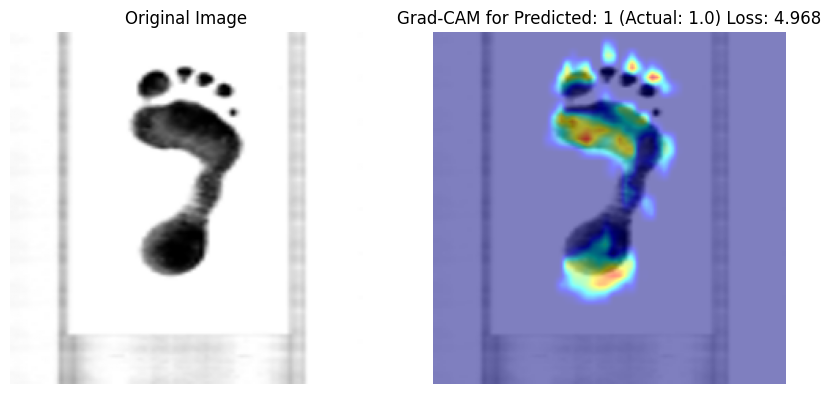

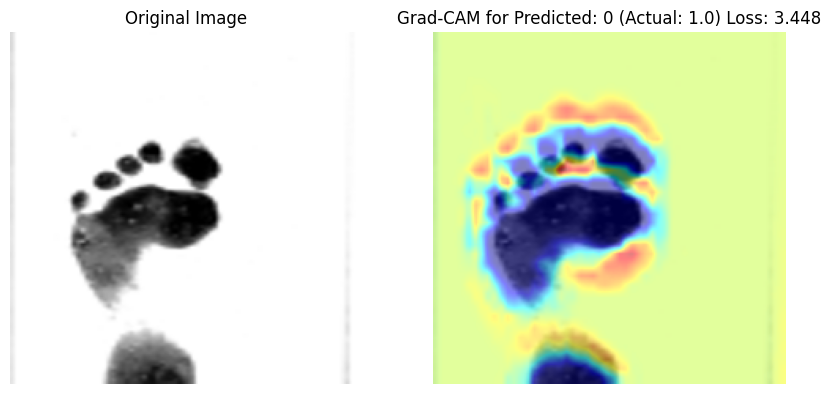

In [ ]:
# Get image path and convert to tensor

for index, row in high_loss_images.iterrows():

    img_idx = int(row['image_index'])


    df_row = valid_loader.dataset.df.iloc[img_idx]
    filename = df_row['filename']
    original_image_path = os.path.join(valid_loader.dataset.img_dir, filename + '.png')


    original_image_pil = Image.open(original_image_path).convert('L')

    # Convert to tensor
    preprocess_for_model = transforms.Compose([
      transforms.Resize(new_size), # Use the dimensions (80, 120) that the model expects
      transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))
    ])

    input_tensor = preprocess_for_model(original_image_pil).unsqueeze(0).to(device) # Add batch dimension and move to device

    # Resize image
    display_img_pil = original_image_pil.resize((224, 224))
    image_np = np.array(display_img_pil) / 255.0

    # Stack grayscale image
    if len(image_np.shape) == 2:
        image_np = np.stack([image_np, image_np, image_np], axis=-1)

    # Initialise grad-CAM
    cam = GradCAM(model=net5, target_layers=[target_layer])

    # Predicting class Ref: Dr HM Pandey
    with torch.no_grad():
        outputs = net5(input_tensor)
        predicted_class = outputs.argmax(dim=1).item()

    # Compute Grad-CAM
    targets = [ClassifierOutputTarget(predicted_class)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0]

    # Explicitly resize grayscale_cam to match image_np's spatial dimensions (224, 224)
    import cv2
    grayscale_cam_resized = cv2.resize(grayscale_cam, (image_np.shape[1], image_np.shape[0]), interpolation=cv2.INTER_LINEAR)

    # Overlay CAM on image
    cam_image = show_cam_on_image(image_np, grayscale_cam_resized, use_rgb=True)

    # Display Results
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(image_np)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title(f'Grad-CAM for Predicted: {predicted_class} (Actual: {df_row["SEX"]}) Loss: {row["loss"]:.3f}')
    plt.imshow(cam_image)
    plt.axis('off')
    plt.show()


**Image Analysis**

The first set of footprints had a prediction value of 0 with an actual value of 1 and the highest loss in the dataframe being 5.343. The model focused on the bottom curve of the heel correctly identifing a curve, as well as the mid foot and ball of the foot, including the toes. Overall, the model was correct in its that the general shape was a tripod that resembled a foot. However, the high loss value suggests that the model had low confidence in classifying this footprint as class 0, implying if the model had to classify this image again, it could have chosen class 1 meaning that the prediction of this foot would be unreliable in a forensic environment.

The second set of footprints had a prediction value of 0 and an actual value of 1 and the loss value was 5.291. From the heatmap, the model had spotted all parts of the foot, especially the right side of the ball of the foot as well as noticing the white pixels around the foot, forming a foot shape on the heatmap.

The third set of footprints had a prediction value of 0 and an actual value of 1 while the loss was 5.030. The foot paid attention to all the whites on the image, especially under the toes, almost as if the model assigned important to the white pixels and ignored the back pixels, giving a resemblence of a footprint on the heatmap.

The fourth set of footprints had a prediction value of 1 and an actual value of 1 with a loss of 4.968. The model paid especially to the bottom heal as well as the ball of the foot, top of the big toe and above the toes. The model recognise the footprint shape and the tight areas of attention within the ball of the foot, suggests that the model correctly paid attention to the borders of the footprint and didnt go outside of it.

The fith set of footprints had a prediction value of 0 and a actual value of 1 with a loss of 3.448. By far the most strange result, The model paid significant attention to the whites of the image, including under the toe and didnt want to touch the dark pixels of the image. This may have been due to the footprint in the dataset having a different shape as the mid foot is non-existent. In a real crime scene footprints wont always be so clear cut, and may look like the image just talked about. If the model is not able to generalise patterns with a footprint that has different properties such as the ball of the foot and heel not connecting, then the model must be trained on a biger, more diverese training set.

**Patterns and Failures in the Image**

Grad-CAM showed that the model paid attention to the heel, ball of the foot and the big toe the most when it had misclassified the image or correctly predicted the class of the image. This could have been because these are the areas that were the most common in many images, indicating some reliability in how it focuses on anatomically meaningful features rather than random artefacts.

###**Legal and Ethical Evaluation of Using the Model**

**Accuracy and Identifying Suspects**

The accuracy of a model only tells us how well it has labelled samples of data correctly, averaged across the whole validation set; that being said, accuracy does not necessarily show how confident the model is or whether there is systematic misclassification, so some of the correctly labelled data could be predicted by chance.

Therefore, we must see how often the model was correct in classifying samples and how many samples the model classified correctly versus how many the model failed to catch. We can call these concepts 'precision' and 'recall', respectively. Precision is important in a machine learning model, as it shows that the model has a low chance of predicting a false positive for a class. In the context of a criminal investigation, if the footprint evidence is what pushes the needle for police to arrest a suspect, that suspect could be innocent, and offenders could get away.

Recall is also important in machine learning models, as it shows how many false negatives we had. If the model had a low recall, it could be too conservative in detecting an offender's footprint and therefore let them go.

The aggregate of both precision and recall can be calculated as one F1-score, which can show the harmonic mean between how precise a model is versus how well the model can recall classifications. Therefore, in a situation where ethics must be upheld to the highest standard to avoid unnecessary suffering of individuals, especially innocents, the F1-score of a model is more likely to give a more accurate and trustworthy score, as the F1-score penalises low precision and low recall.

However, during the SOTA quantitative analysis, ResNet18 and AlexNet both had low precision for one class but then high recall for that very same class. This was demonstrated in the following example:

**ResNet18:**

Precision class 1: 0.751

Precision class 0: 0.768

Recall: 0.715

Recall class 0: 0.8

F1 score class 1: 0.733

F1 score class 0: 0.783

F1 macro-average: 0.756

**AlexNet**

Accuracy: 0.757

Precision class 1: 0.72

Precision class 0: 0.79

Recall: 0.77

Recall class 0: 0.747

F1 score class 1: 0.74

F1 score class 0: 0.769

F1 macro-average: 0.756

While both ResNet18 and AlexNet had imbalanced precision and recall values for both classes, the F1 score of both classes and ultimately the macro-average F1 score showed that potentially the model was trustworthy, but on closer inspection and measuring the precision and recall differences between the two classifications, both models showed a near extreme bias towards one class over the other.

For example, in the confusion matrix of ResNet18, 239 footprints were correctly identified as their class, but 41 footprints were false positives, meaning that 41 individuals could have been mistakenly implicated in a crime and wrongfully investigated. In addition, there were 34 footprints that were false negatives, suggesting that 34 real offenders could get away.

This demonstrates that given a real situation, an innocent could have been arrested and possibly charged if the footprint evidence was admitted to court and pushed the needle for the jury to convict that individual, highlighting a lack of ethical conduct in training and deploying the model for a real-life use case.

**Bias and dataset limitations**

The whole dataset is made up of 1,573 footprint images, with 845 footprints classed as 0 and 728 footprints classed as 1. A seperate test set of images 1,055 were provided. In addition, the images were resized to 80 by 120 so that the neural networks could train a bit faster while still being able to find patterns in the footprints. As we can see and as has been commented before, there is a slight imbalance in the dataset and the small size of the dataset should be noted. A more balanced dataset as well as a bigger dataset would help train the models to make predictions more precise.

As we saw with the baseline variant and SOTA model quantatative analysis, the imbalance in the dataset has especially affected the bigger models such as ResNet18 and AlexNet as compared to the baseline variant and EfficientNet-B0. For example, ResNet18 has 18 layers, AlexNet has 8 layers as compared to the baseline variant model which has 6 learnable layers. For this footprint classifier, the smaller dataset benefits the smaller, less complex model.

Following the Grad-CAM analysis of the baseline variant 4 model, the model most attention to the heel, ball of the foot and big toe, indicating that it recognises a foot. In addtion, while the model tends to not notice any background artifacts as the gray scale footprints provide only white to black colouring, the model does seem to sometimes ignore the black pixels of the foot and instead focus on the background around the foot and pay attention to the white of the image. Thus, in the heatmap it creats a footlike shape by paying attention only to the white pixels of the image which does not neccesarily correspond to the anatomy of the foot but rather the gray-scale white background style of the dataset.

In a legal context, the imbalanced dataset would be called into question as well as the size and the gray scale style of the image. Thus even if the model was precise and had good recall, in a court of law, the defense or the offender could still argue that the model's predictions are based off unrealistic footprint images and not real, coloured footprints with background noise. Therefore, the model's predictions are not used as evidence.

**Grad-CAM and evidential status**

White Grad-CAM, or Gradient weighted Class Activation Map, can show us how a model made a prediction from an input; it only provides a rough visual estimation, not proof of reasoning. One limitation of Grad-CAM is that since it uses the gradients from the final convolutional layer, it could give heatmaps that are low resolution and do not capture the fine details in an image, such as the toes in the footprint images, especially when gradients are noisy. [14]

Another limitation of Grad-CAM is that the accuracy of the heatmaps can be affected by the architecture of the model. For example, a bigger model such as AlexNet, which if trained on a much larger dataset such as the 2012 training dataset of 1.2 million images, could provide exceptional accuracy; however, Grad-CAM would struggle to capture the inner workings of AlexNet as it is a complex model with 8 learnable layers. Therefore, it would be harder to explain how AlexNet came to a prediction if we were to use the footprint classification as standalone legal evidence; however, for our baseline variant 4 model with 6 learnable layers, Grad-CAM can give a greater insight into the inner workings of the baseline variant 4 model, as it is less complex than a state-of-the-art model such as AlexNet.[14].

The interpretability of the model's predictions, while explainable by Grad-CAM, is a rather weak form of evidence, as the model does not show robust reliability in how it has made predictions. In one footprint image, it captures the heel, ball of the foot and toes; in another, it captures the whites of the background which form a foot. Therefore, the interpretability of the model should be used as supporting investigative evidence to help forensic scientists craft a bigger picture, rather than be used as proof of attendance at a crime scene.

#**Section 7: Conclusion and Reflection**

Overall, the baseline + early stopping + dropout model will be picked as the final model, as it had the highest combined accuracy, precision and recall. The main strength of the model is the balanced classification metrics despite the dataset imbalance, showing no extreme bias towards either sex. One weakness of the model was the shallowness of the architecture and capacity, which, while adequate for the small dataset of 1,573 footprint images, would most likely plateau given a larger, more diverse footprint dataset, where a larger, better-built and trained model such as EfficientNet-B0-3 could find more patterns and achieve higher performance.

That being said, the quantitative evaluation of the final model which was the dropout + early stopping model showed reliable and valid results when classifying footprints and identified 83% of footprints correctly.

The final model had findings of:
* Accuracy: 0.828
* Precision class 1: 0.816
* Precision class 0: 0.838
* Recall class 1: 0.816
* Recall class 0: 0.838
* F1 score class 1: 0.816
* F1 score class 0: 0.88

Grad-CAM revealed that the baseline variant model identified the tripod of the foot and noticed that the class 1 footprints were larger than the class 0 footprints. However, if size alone was the determining factor that assigned the footprint a sex, then, given a larger, more demographically diverse dataset where males and females can have different foot sizes, for example, a small footprint that was left by a male could be predicted as female, thus affecting the validity of the results.

**Conclusion**

To conclude this project, despite the Grad-CAM heatmap patterns, I would deploy the baseline + early stopping + dropout layer model in a forensic environment; however, the footprint classifications of the final model/baseline variant 4 should not be used as primary evidence in court.

However, seeing how the model had precision and had good recall, giving an F1 score for class 1 of 0.816 and for class 0, 0.838. The predictions can still be used as supporting evidence, but only if the following safeguards are followed:

* Expert human review of footprints and Grad-CAM heatmaps. This is to ensure the validity of the prediction.

* Clear disclosure of limitations of the model's prediction to investigators and legal representatives.

* Clear confidence thresholds should be exposed from an added softmax layer that would compute the raw logits into a probability so that low confidence/probability local classifications of images are discarded or flagged instead, of being used as supporting evidence.


## References ##

The Mystery of Lyle and Louise: Footprint analysis, Available from: https://ktennant.weebly.com/uploads/3/8/2/4/38248527/footprint_background_reading.pdf [1]

Pravesh Charan Isai, 2021. Estimation of gender from the dimensions of foot, footprints and shoes. Legal Desire. Available from:
https://legaldesire.com/estimation-of-gender-from-the-dimensions-of-foot-footprints-and-shoes/ [2]


Gaudenz Boesch(2023) ResNet: Revolutionizing Deep Learning in Image,Available at:
https://viso.ai/deep-learning/resnet-residual-neural-network/ [3]


n.a (No Date), Context 1. Available from: https://www.researchgate.net/figure/The-number-of-parameters-per-layer-in-the-ResNet-18-model_tbl1_358555196 [4]


Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012), “ImageNet Classification with Deep Convolutional Neural Networks.”, Availabile from: https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf
[5]

n.a (No Date), 8.1 Deep Convolutional Neural Networks (AlexNet), Available from: https://d2l.ai/chapter_convolutional-modern/index.html
[6]

n.a (No Date), ResNet, AlexNet, VGG19, Inception: Understanding various architectures of convolutional networks., Available from: https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/ [7]

Mingxing Tan, Quo V. Le(Sept 2020), EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks, Available from: https://arxiv.org/pdf/1905.11946 [8]

Abirami Vina, (August 2025), What is EfficientNet? A quick overview., Available from: https://www.ultralytics.com/blog/what-is-efficientnet-a-quick-overview#:~:text=%E2%80%8D-,A%20brief%20overview%20of%20EfficientNet%27s%20model%20variants,is%20optimized%20for%20modern%20hardware.[10]

Washija Kazim, (July 2025), Is EfficientNet Right for Your Enterprise AI Strategy?, Availabe from: https://learn.g2.com/efficientnet [13]

ColeTrade, (Sept 2023) Understand the Grad-CAM: A Complete Guide With Example, Available from: https://www.codetrade.io/blog/grad-cam-a-complete-guide-with-example/ [14]

Kaiming He et al, (Dec 2015) Deep Residual Learning for Image Recognition, Available from:
https://arxiv.org/pdf/1512.03385 [15]

Ramprasaath R. Selvaraju et al, (2017), Grad-CAM:
Visual Explanations from Deep Networks via Gradient-based Localization, Available at:
https://openaccess.thecvf.com/content_ICCV_2017/papers/Selvaraju_Grad-CAM_Visual_Explanations_ICCV_2017_paper.pdf [17]
